In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import linregress, theilslopes
import re

In [2]:
base_directory = 'data/SWOT_GNSS_processed_csvs/'
# Dictionary to store the dataframes
dataframes_dict = {}
# Walk through all directories and files
for root, dirs, files in os.walk(base_directory):
    for filename in files:
        if filename.endswith("_height.csv"):
            # Construct full file path
            file_path = os.path.join(root, filename)
            # Read the CSV file into a DataFrame
            df = pd.read_csv(file_path)
            # Store the DataFrame in the dictionary with the file name (without extension) as the key
            key = os.path.splitext(filename)[0]
            dataframes_dict[key] = df

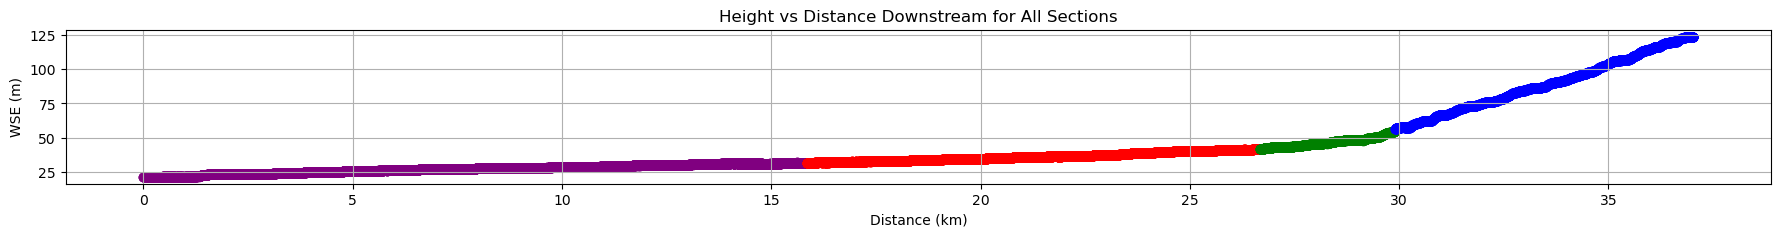

In [3]:
# Define the reversed order of keys
keys_order = [
    'buffered_66190600011_GNSS_SWOT_cumulative_dist_height',
    'buffered_66190600023_GNSS_SWOT_cumulative_dist_height',
    'buffered_66190600033_GNSS_SWOT_cumulative_dist_height',
    'buffered_66190600041_GNSS_SWOT_cumulative_dist_height',
    'buffered_66190600041_20240131_GNSS_SWOT_cumulative_dist_height',
    'buffered_66190600023_20240131_GNSS_SWOT_cumulative_dist_height'
]

# Define the color scheme for each key
color_scheme = {
    'buffered_66190600011_GNSS_SWOT_cumulative_dist_height': 'purple',
    'buffered_66190600023_GNSS_SWOT_cumulative_dist_height': 'red',
    'buffered_66190600033_GNSS_SWOT_cumulative_dist_height': 'green',
    'buffered_66190600041_GNSS_SWOT_cumulative_dist_height': 'blue',
    'buffered_66190600041_20240131_GNSS_SWOT_cumulative_dist_height' : 'darkblue',
    'buffered_66190600023_20240131_GNSS_SWOT_cumulative_dist_height' : 'darkred'
}


color_scheme_SWOT = {
    'buffered_66190600011_GNSS_SWOT_cumulative_dist_height': 'violet',
    'buffered_66190600023_GNSS_SWOT_cumulative_dist_height': 'lightsalmon',
    'buffered_66190600033_GNSS_SWOT_cumulative_dist_height': 'limegreen',
    'buffered_66190600041_GNSS_SWOT_cumulative_dist_height': 'xkcd:sky blue',
    'buffered_66190600041_20240131_GNSS_SWOT_cumulative_dist_height' : 'cornflowerblue',
    'buffered_66190600023_20240131_GNSS_SWOT_cumulative_dist_height' : 'lightsalmon'
}

# Initialize the cumulative offset
cumulative_offset = 0

# Plotting
plt.figure(figsize=(22, 2))

for key in keys_order[0:4]:
    df = dataframes_dict[key]
    
    # Handle NaNs by dropping them
    df = df.dropna(subset=['cumulative_distance', 'Height(m)'])
    
    # Adjust the cumulative distance for the current section
    cumulative_distance_gnss = (df['cumulative_distance']/1000) + cumulative_offset

    cumulative_distance_swot = (df['cumulative_distance']/1000) + cumulative_offset
    
    # Scatter plot for cumulative_distance_GNSS vs GNSS_height
    plt.scatter(cumulative_distance_gnss, df['Height(m)'], label=f'GNSS ({key})', marker='o', color=color_scheme[key])

    # Scatter plot for cumulative_distance_SWORD vs nearest_height_SWORD
    #plt.scatter(cumulative_distance_swot, df['nearest_height_SWORD'], label=f'SWOT', alpha = .2, marker='x', color = color_scheme_SWOT[key])
    
    
    # Update the cumulative offset for the next section
    cumulative_offset = (df['cumulative_distance']/1000 + cumulative_offset).max()

# Adding titles and labels
plt.title('Height vs Distance Downstream for All Sections')
plt.xlabel('Distance (km)')
plt.ylabel('WSE (m)')
#plt.legend()
plt.grid(True)

plt.savefig(f'figs/GNSS_data_all_reaches.png', dpi=300, bbox_inches='tight')

# Show plot
plt.show()

In [4]:
def apply_filter(df):
    return df[(df['classification'] > 2) & (df['classification'] !=5)].copy()

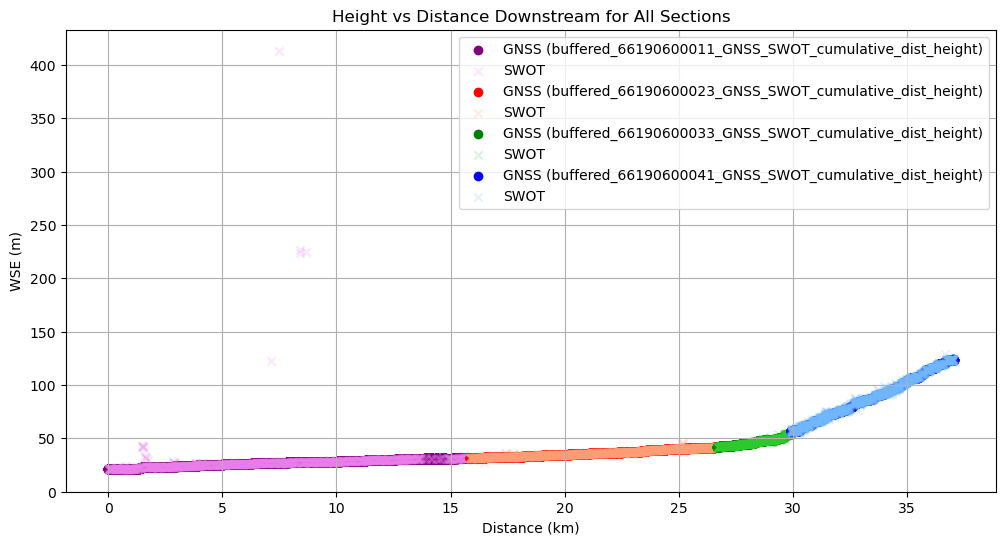

In [5]:
# Initialize the cumulative offset
cumulative_offset = 0

# Plotting
plt.figure(figsize=(12, 6))

for key in keys_order[0:4]:
    df = dataframes_dict[key]

    # Apply filter to keep points where classification is greater than 2
    df_filtered = apply_filter(df)
    
    # Handle NaNs by dropping them
    df = df.dropna(subset=['cumulative_distance', 'Height(m)'])
    
    # Adjust the cumulative distance for the current section
    cumulative_distance_gnss = (df['cumulative_distance']/1000) + cumulative_offset
    

    cumulative_distance_swot = (df_filtered['nearest_GNSS_dist']/1000) + cumulative_offset
    
    # Scatter plot for cumulative_distance_GNSS vs GNSS_height
    plt.scatter(cumulative_distance_gnss, df['Height(m)'], label=f'GNSS ({key})', marker='o', color=color_scheme[key])

    
    # Scatter plot for cumulative_distance_SWORD vs nearest_height_SWORD
    plt.scatter(cumulative_distance_swot, df_filtered['height'], label=f'SWOT', alpha = .2, marker='x', color = color_scheme_SWOT[key])
    
    
    # Update the cumulative offset for the next section
    cumulative_offset = (df['cumulative_distance']/1000 + cumulative_offset).max()

# Adding titles and labels
plt.title('Height vs Distance Downstream for All Sections')
plt.xlabel('Distance (km)')
plt.ylabel('WSE (m)')
plt.legend()
plt.grid(True)

#plt.savefig(f'figs/GNSS_data_all_reaches.png', dpi=300, bbox_inches='tight')

# Show plot
plt.show()

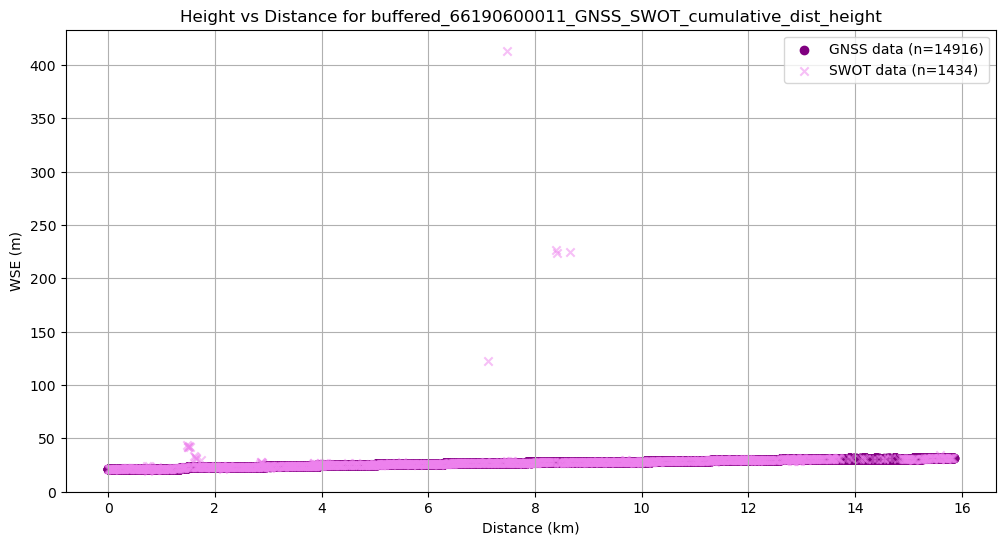

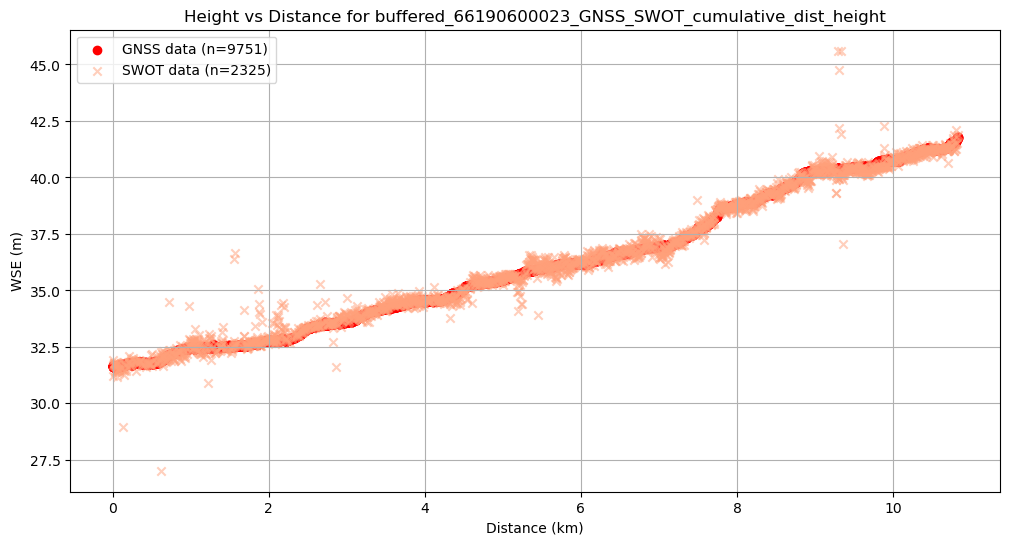

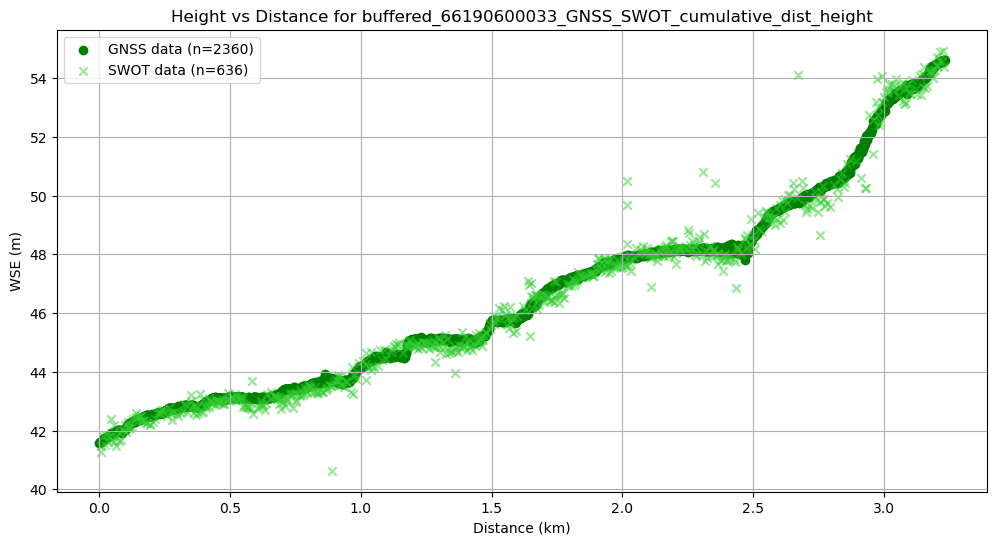

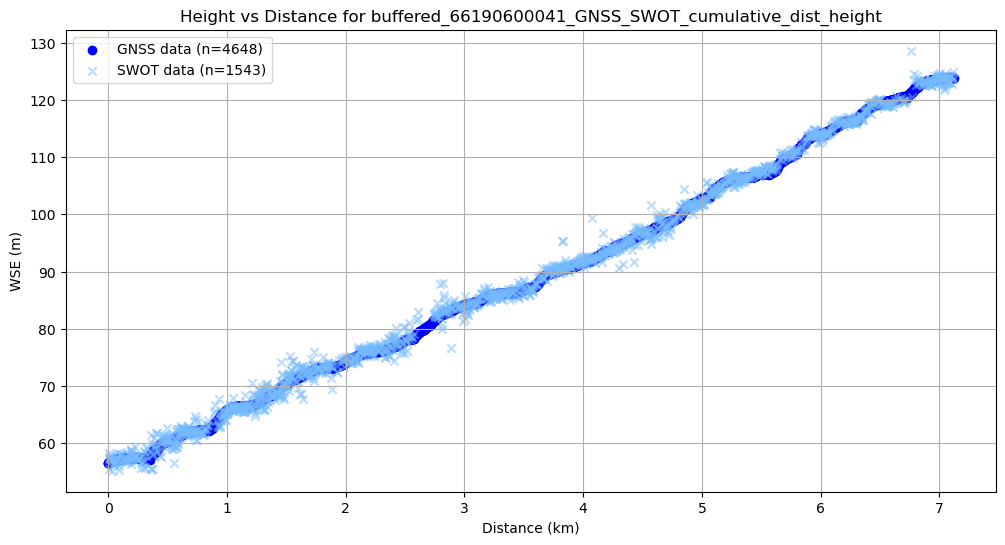

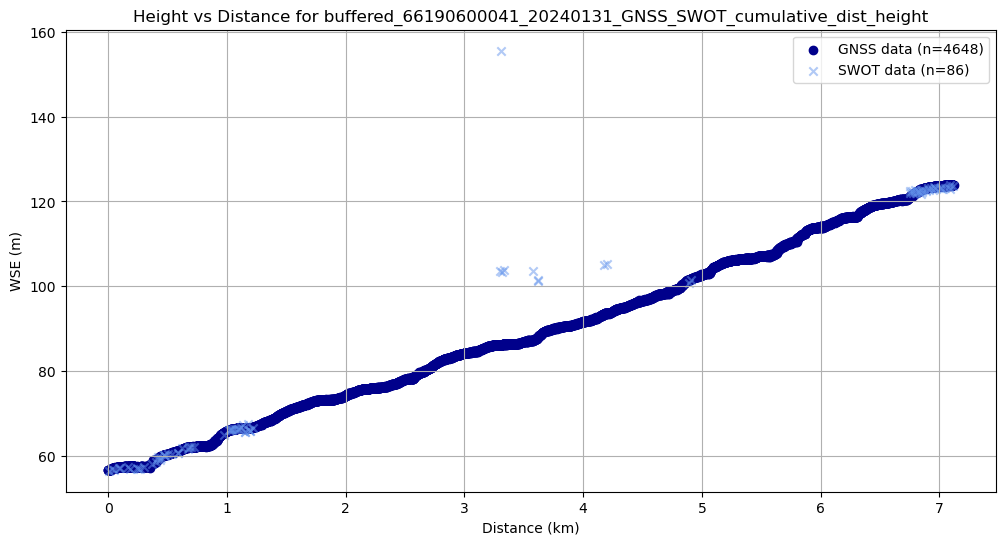

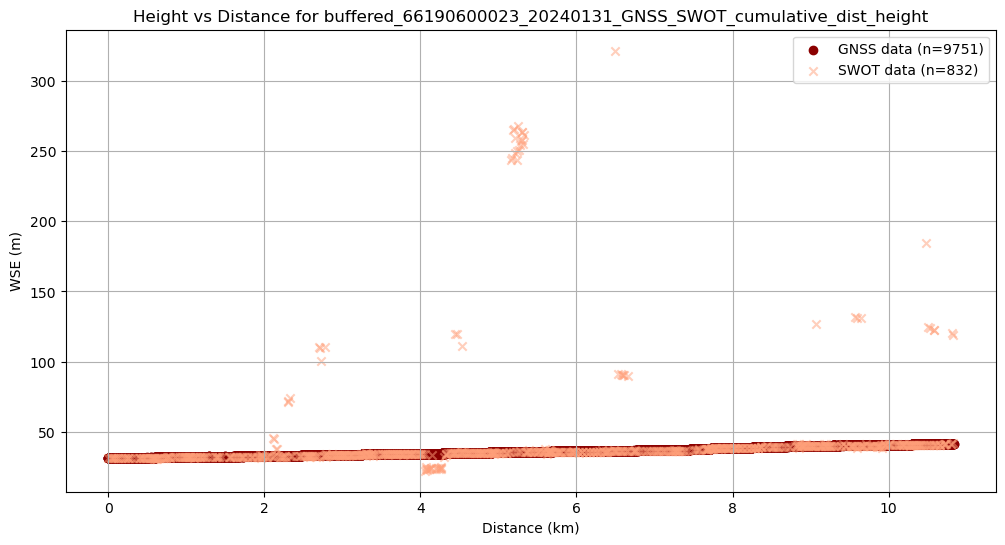

In [6]:
# Loop through each key in the dictionary
for key in keys_order:
    df = dataframes_dict[key].iloc[::-1]  # Reverse the order of the dataframe
    
    # Apply filter to keep points where classification is greater than 2
    df_filtered = apply_filter(df)
    
    # Plotting
    plt.figure(figsize=(12, 6))
    
    non_na_gnss = len(df)

    non_na_SWOT = len(df_filtered['height'].dropna())
    
    # Scatter plot for cumulative_distance_GNSS vs GNSS_height
    plt.scatter(df['cumulative_distance'] / 1000, df['Height(m)'], label=f'GNSS data (n={non_na_gnss})', marker='o', color=color_scheme[key])
    
    # Scatter plot for cumulative_distance_SWORD vs nearest_height_SWORD
    plt.scatter(df_filtered['nearest_GNSS_dist'] / 1000, df_filtered['height'], label=f'SWOT data (n={non_na_SWOT})', alpha = .5, marker='x', color = color_scheme_SWOT[key])
    
    # Adding titles and labels
    plt.title(f'Height vs Distance for {key}')
    plt.xlabel('Distance (km)')
    plt.ylabel('WSE (m)')
    plt.legend()
    plt.grid(True)

    plt.savefig(f'figs/{key}_SWOT_vs_GNSS.png', dpi=300, bbox_inches='tight')
    
    # Show plot
    plt.show()


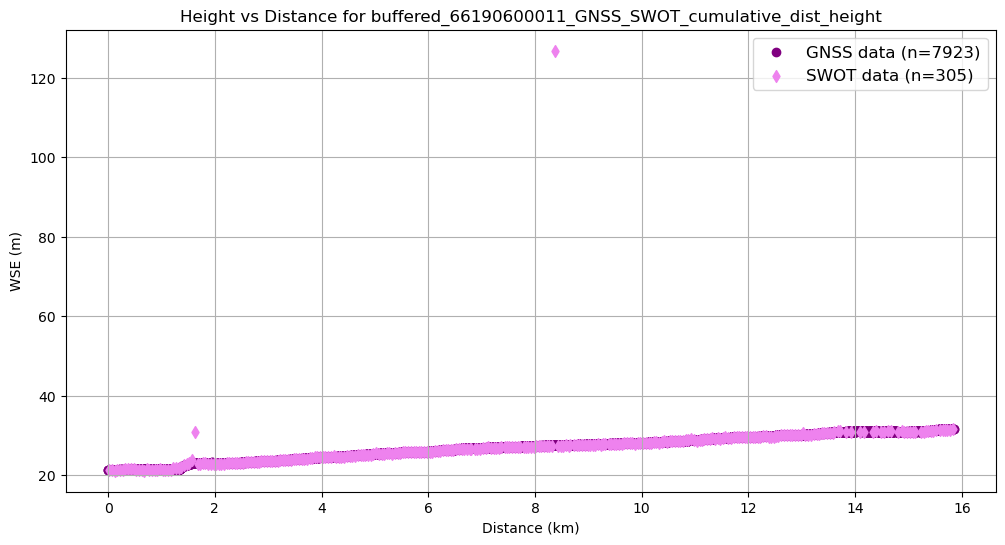

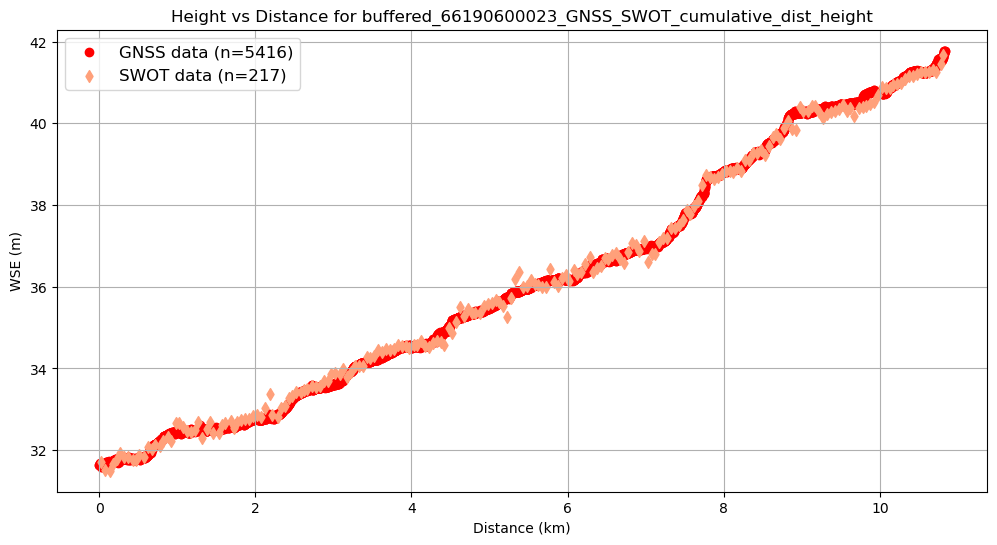

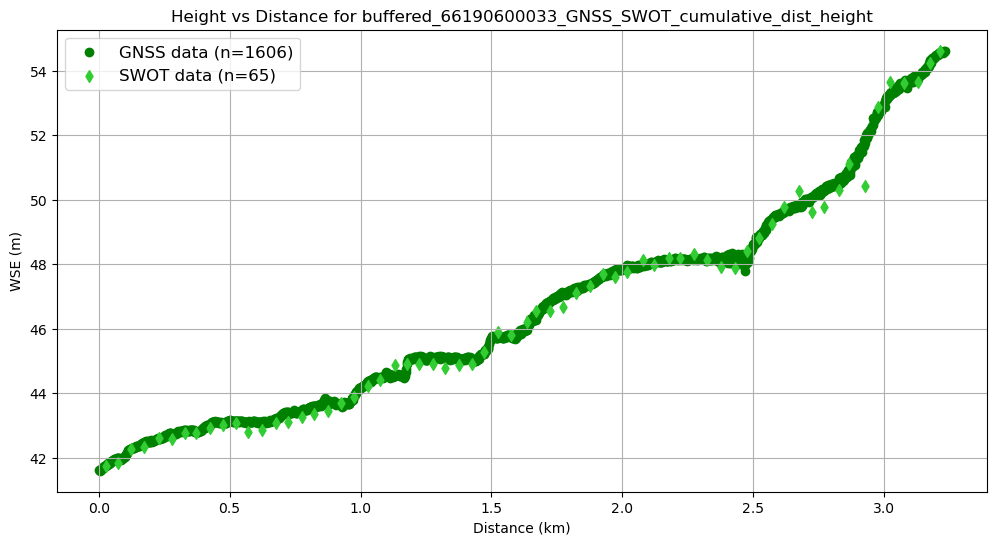

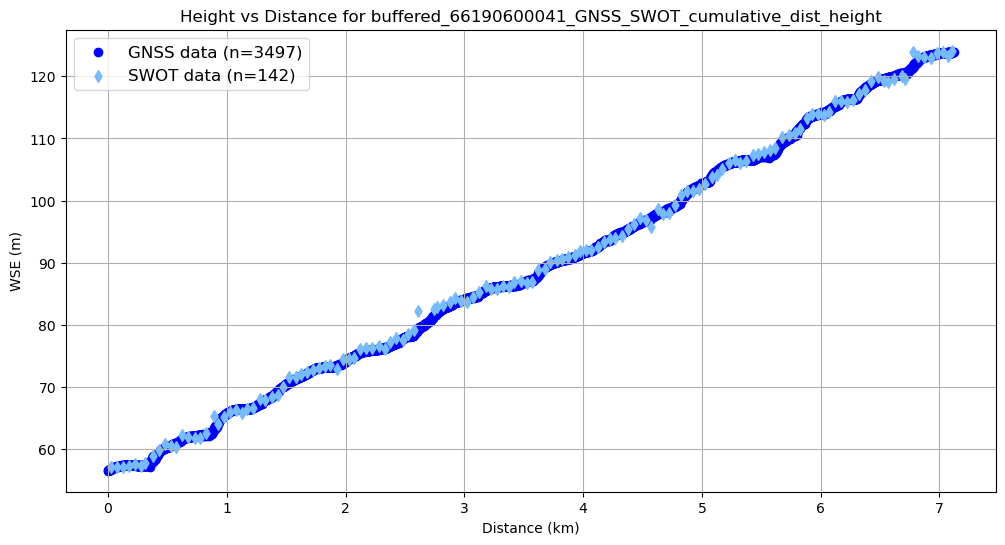

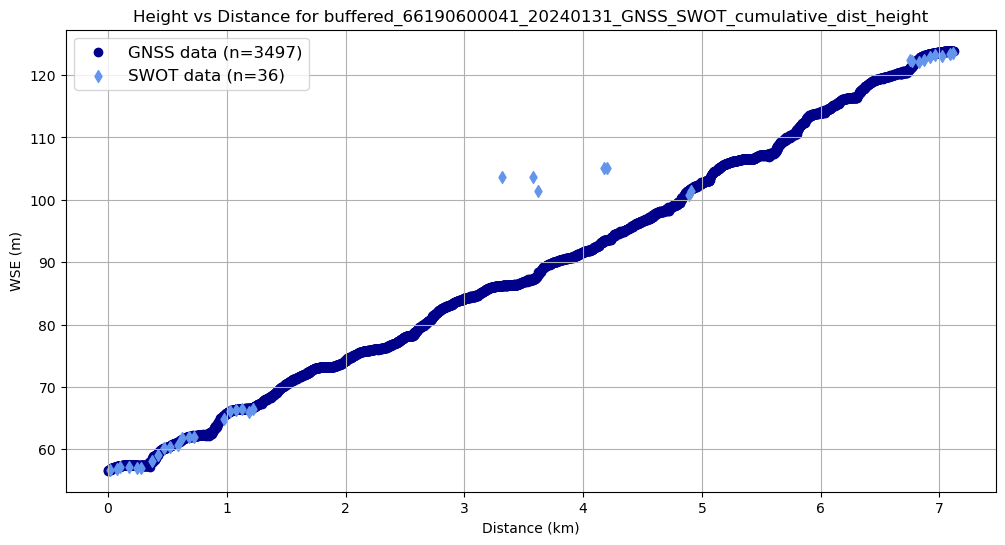

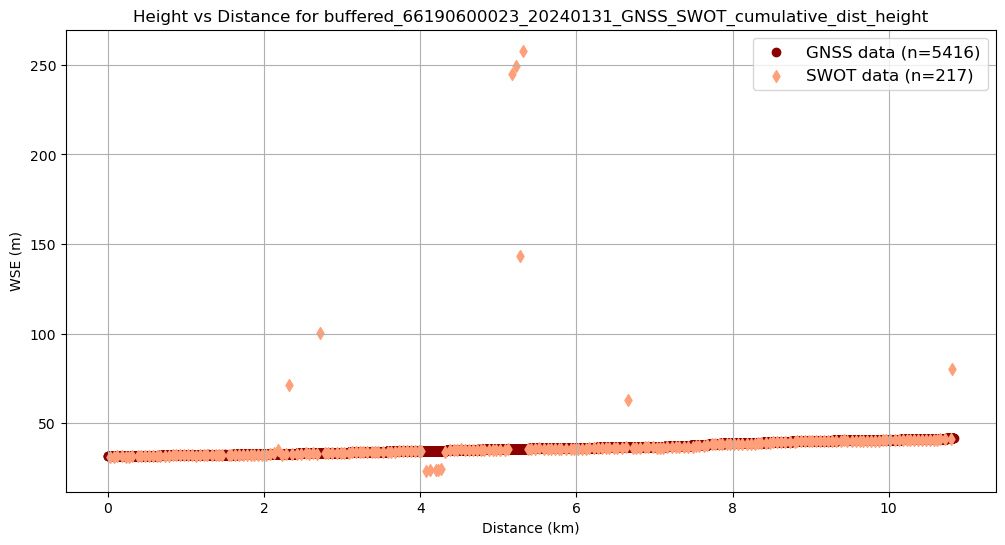

In [7]:
# Loop through each key in the dictionary
for key in keys_order:
    df = dataframes_dict[key].iloc[::-1].copy()  # Reverse the order of the dataframe
    
    # Apply filter to keep points where classification is greater than 2
    df_filtered = apply_filter(df)
    
    # Create bins for every 5 meters in GNSS cumulative_distance
    bins_gnss = np.arange(0, df['cumulative_distance'].max() + 2, 2)
    bins_swot = np.arange(0, df_filtered['nearest_GNSS_dist'].max() + 50, 50)
    
    # Bin and average GNSS data
    df['binned_distance_GNSS'] = pd.cut(df['cumulative_distance'], bins=bins_gnss)
    df_binned_gnss = df.groupby('binned_distance_GNSS', observed=True).agg({'cumulative_distance': 'mean', 'Height(m)': 'mean'}).dropna()

    # Bin and average SWOT data
    df_filtered.loc[:, 'binned_distance_SWOT'] = pd.cut(df_filtered['nearest_GNSS_dist'], bins=bins_swot)
    df_binned_swot = df_filtered.groupby('binned_distance_SWOT', observed=True).agg({'nearest_GNSS_dist': 'mean', 'height': 'median'}).dropna()

    # Plotting
    plt.figure(figsize=(12, 6))
    
    non_na_gnss = len(df_binned_gnss)
    non_na_SWOT = len(df_binned_swot)

    # Scatter plot for binned GNSS data
    plt.scatter(df_binned_gnss['cumulative_distance'] / 1000, df_binned_gnss['Height(m)'], 
                label=f'GNSS data (n={non_na_gnss})', marker='o', color=color_scheme[key])

    # Scatter plot for binned SWOT data
    plt.scatter(df_binned_swot['nearest_GNSS_dist'] / 1000, df_binned_swot['height'], 
                label=f'SWOT data (n={non_na_SWOT})', alpha=1, marker='d', color=color_scheme_SWOT[key])

    # Adding titles and labels
    plt.title(f'Height vs Distance for {key}')
    plt.xlabel('Distance (km)')
    plt.ylabel('WSE (m)')
    plt.legend(fontsize=12)
    plt.grid(True)

    # Save plot
    plt.savefig(f'figs/{key}_SWOT_vs_GNSS_binned.png', dpi=300, bbox_inches='tight')

    # Show plot
    plt.show()


In [8]:
slope_differences_ols = []
slope_differences_theil_sen = []

# List to store the regression results
ols_results = []
theil_sen_results = []

# Loop through each key in the dictionary
for key in keys_order:
    df = dataframes_dict[key].iloc[::-1].copy()  # Reverse the order of the dataframe

    # Apply filter to keep points where classification is greater than 2
    df_filtered = apply_filter(df)
    
    # Create bins for every 5 meters in GNSS cumulative_distance
    bins_gnss = np.arange(0, df['cumulative_distance'].max() + 2, 2)
    bins_swot = np.arange(0, df_filtered['nearest_GNSS_dist'].max() + 50, 50)
    
    # Bin and average GNSS data
    df['binned_distance_GNSS'] = pd.cut(df['cumulative_distance'], bins=bins_gnss)
    df_binned_gnss = df.groupby('binned_distance_GNSS', observed=True).agg({'cumulative_distance': 'median', 'Height(m)': 'median'}).dropna()

    # Bin and average SWOT data
    df_filtered.loc[:, 'binned_distance_SWOT'] = pd.cut(df_filtered['nearest_GNSS_dist'], bins=bins_swot)
    df_binned_swot = df_filtered.groupby('binned_distance_SWOT', observed=True).agg({'nearest_GNSS_dist': 'median', 'height': 'median'}).dropna()

    
     # Prepare GNSS data for OLS
    X1_GNSS = df_binned_gnss['cumulative_distance'].dropna()
    y1_GNSS = df_binned_gnss['Height(m)'].dropna()

    # Fit OLS model using scipy's linregress for GNSS data
    slope_gnss, intercept_gnss, r_value_gnss, p_value_gnss, std_err_gnss = linregress(X1_GNSS, y1_GNSS)

    # Append GNSS OLS results to the list, with params as a pandas Series
    ols_results.append({
        'key': key,
        'model': 'GNSS',
        'params': pd.Series({'const': intercept_gnss, 'slope': slope_gnss}),
        'r_squared': r_value_gnss ** 2
    })

    gnss_slope_ols = slope_gnss

    # Prepare SWORD data for OLS
    X2_SWOT = df_binned_swot['nearest_GNSS_dist'].dropna()
    y2_SWOT = df_binned_swot['height'].dropna()

    # Fit OLS model using scipy's linregress for SWORD data
    slope_sword, intercept_sword, r_value_sword, p_value_sword, std_err_sword = linregress(X2_SWOT, y2_SWOT)

    # Append SWORD OLS results to the list, with params as a pandas Series
    ols_results.append({
        'key': key,
        'model': 'SWORD',
        'params': pd.Series({'const': intercept_sword, 'slope': slope_sword}),
        'r_squared': r_value_sword ** 2
    })

    sword_slope_ols = slope_sword

    # Calculate the difference in slopes for OLS
    gnss_slope_ols = gnss_slope_ols * 1000
    sword_slope_ols = sword_slope_ols * 1000

    slope_difference_ols = np.sqrt(np.mean((gnss_slope_ols - sword_slope_ols) ** 2))
    slope_differences_ols.append({
        'key': key,
        'gnss_slope': gnss_slope_ols,
        'sword_slope': sword_slope_ols,
        'slope_rmse': slope_difference_ols
    })
    
    # Fit Theil-Sen model for GNSS data
    ts_slope, ts_intercept, _, _ = theilslopes(y1_GNSS, X1_GNSS)
    theil_sen_results.append({
        'key': key,
        'model': 'GNSS',
        'intercept': ts_intercept,
        'slope': ts_slope
    })

    gnss_slope_ts = ts_slope
    
    # Fit Theil-Sen model for SWORD data
    ts_slope_sword, ts_intercept_sword, _, _ = theilslopes(y2_SWOT, X2_SWOT)
    theil_sen_results.append({
        'key': key,
        'model': 'SWORD',
        'intercept': ts_intercept_sword,
        'slope': ts_slope_sword
    })

    sword_slope_ts = ts_slope_sword

    # Calculate the difference in slopes for Theil-Sen
    gnss_slope_ts = gnss_slope_ts * 1000
    sword_slope_ts = sword_slope_ts * 1000
    
    slope_difference_ts = np.sqrt(np.mean((gnss_slope_ts - sword_slope_ts) ** 2))
    slope_differences_theil_sen.append({
        'key': key,
        'gnss_slope': gnss_slope_ts,
        'sword_slope': sword_slope_ts,
        'slope_rmse': slope_difference_ts
    })
    print(f'{key} is done')


buffered_66190600011_GNSS_SWOT_cumulative_dist_height is done
buffered_66190600023_GNSS_SWOT_cumulative_dist_height is done
buffered_66190600033_GNSS_SWOT_cumulative_dist_height is done
buffered_66190600041_GNSS_SWOT_cumulative_dist_height is done
buffered_66190600041_20240131_GNSS_SWOT_cumulative_dist_height is done
buffered_66190600023_20240131_GNSS_SWOT_cumulative_dist_height is done


In [9]:
def perform_quantile_regressions(keys_order, dataframes_dict):
    # Initialize a dictionary to store the slopes and intercepts
    quantile_regression_results = {}

    for key in keys_order:
        df = dataframes_dict[key].iloc[::-1]  # Reverse the order of the dataframe

        # Apply filter to keep points where classification is greater than 2
        df_filtered = apply_filter(df)
        
        # Process GNSS data
        df_GNSS_data = pd.DataFrame({
            'y': df['Height(m)'], 
            'x': df['cumulative_distance'] / 1000
        }).dropna()

        # Quantiles from 0.05 to 0.95
        quantiles = np.arange(0.01, 1, 0.01)

        # Store results for GNSS
        gnss_slopes = []
        gnss_results = []
        for q in quantiles:
            quant_reg = smf.quantreg('y ~ x', df_GNSS_data).fit(q=q, max_iter=10000)
            gnss_results.append((quant_reg.params['Intercept'], quant_reg.params['x']))
            gnss_slopes.append(quant_reg.params['x'])

        # Process SWORD data
        df_SWOT_data = pd.DataFrame({
            'y': df_filtered['height'], 
            'x': df_filtered['nearest_GNSS_dist'] / 1000
        }).dropna()

        # Store results for SWORD
        sword_results = []
        sword_slopes = []
        for q in quantiles:
            quant_reg = smf.quantreg('y ~ x', df_SWOT_data).fit(q=q, max_iter=10000)
            sword_results.append((quant_reg.params['Intercept'], quant_reg.params['x']))
            sword_slopes.append(quant_reg.params['x'])

        diff_slopes = [np.sqrt(np.mean((point1 - point2) ** 2)) for point1, point2 in zip(gnss_slopes, sword_slopes)]

        # Save the slopes and intercepts in the dictionary
        quantile_regression_results[key] = {
            'quantiles': quantiles,
            'gnss_results': gnss_results,
            'sword_results': sword_results,
            'diff_slopes': diff_slopes
        }

    return quantile_regression_results

# Perform quantile regressions and store the results
quantile_regression_results = perform_quantile_regressions(keys_order, dataframes_dict)

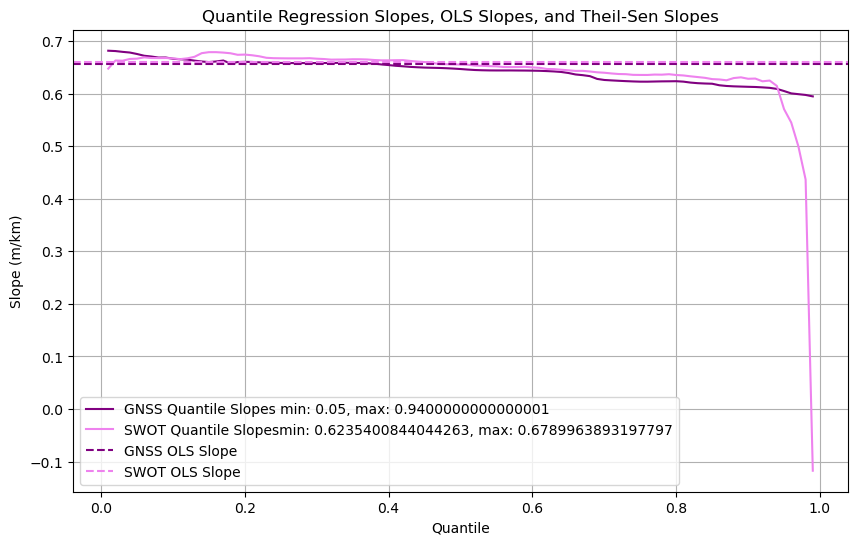

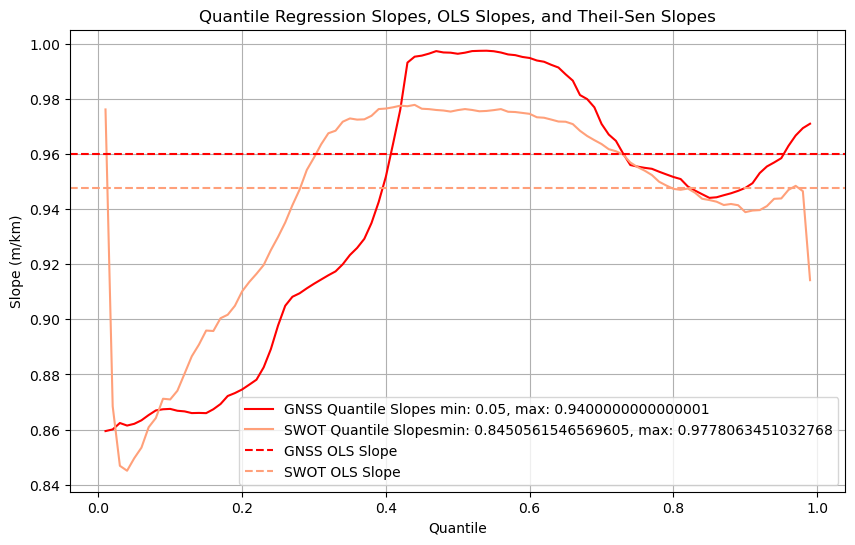

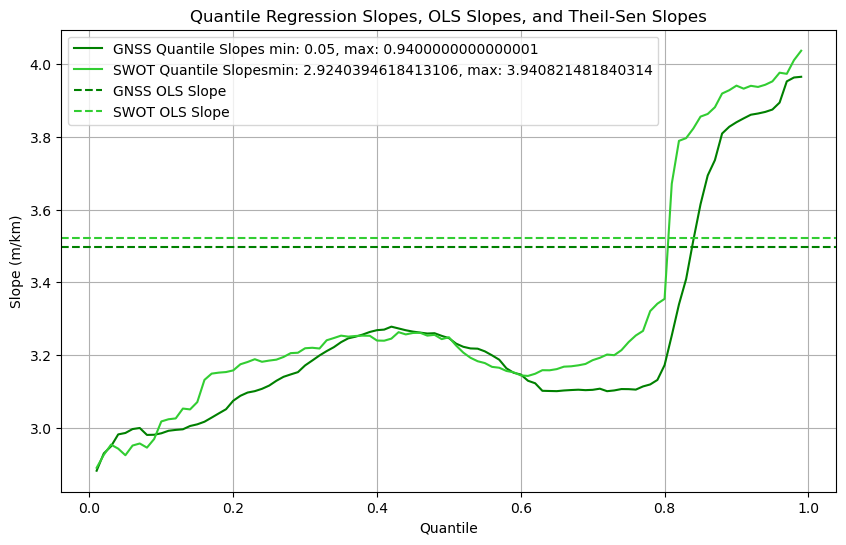

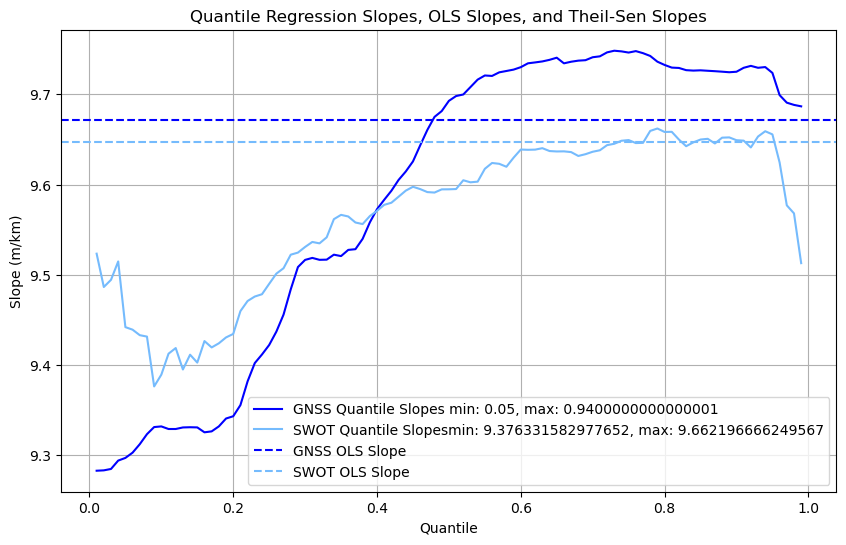

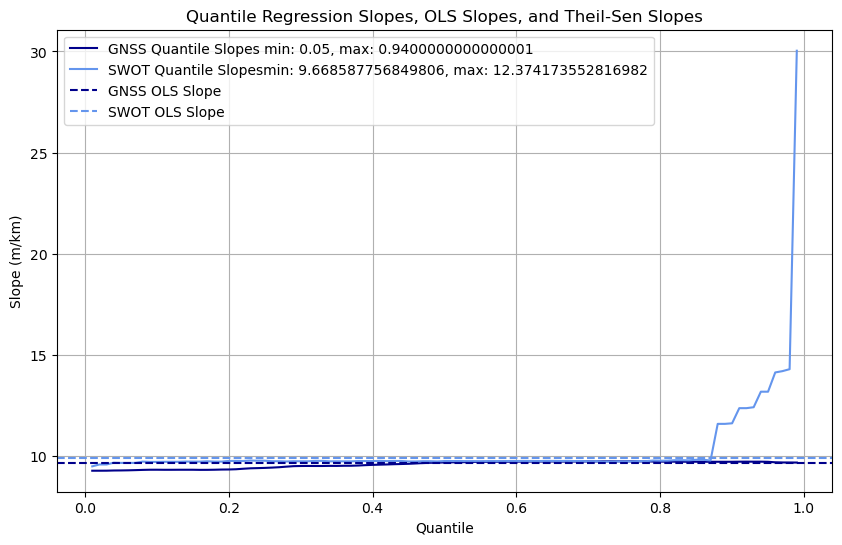

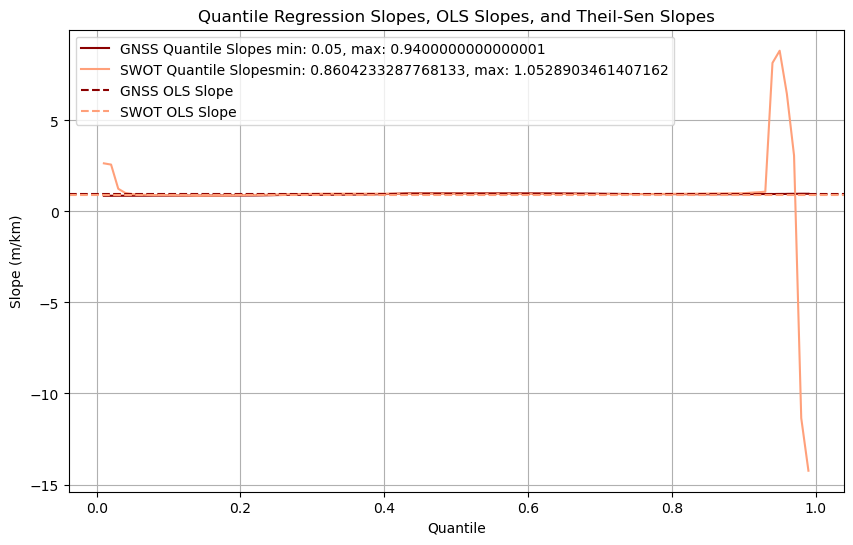

In [10]:
def plot_quantile_regression_results(quantile_regression_results, ols_results, theil_sen_results, keys_order, color_scheme, color_scheme_SWOT):
    for key in keys_order:
        # Retrieve quantile regression results
        quantiles = quantile_regression_results[key]['quantiles']
        gnss_results = quantile_regression_results[key]['gnss_results']
        sword_results = quantile_regression_results[key]['sword_results']

        # Extract slopes for plotting
        gnss_slopes = [result[1] for result in gnss_results]
        sword_slopes = [result[1] for result in sword_results]

        # Retrieve the OLS slopes for GNSS and SWORD
        gnss_ols_slope = None
        sword_ols_slope = None
        for result in ols_results:
            if result['key'] == key and result['model'] == 'GNSS':
                gnss_ols_slope = result['params'].iloc[1]
            if result['key'] == key and result['model'] == 'SWORD':
                sword_ols_slope = result['params'].iloc[1]

        # Convert OLS slopes to m/km
        if gnss_ols_slope is not None:
            gnss_ols_slope *= 1000
        if sword_ols_slope is not None:
            sword_ols_slope *= 1000

        # # Retrieve the Theil-Sen slopes for GNSS and SWORD
        # gnss_ts_slope = None
        # sword_ts_slope = None
        # for result in theil_sen_results:
        #     if result['key'] == key and result['model'] == 'GNSS':
        #         gnss_ts_slope = result['slope']
        #     if result['key'] == key and result['model'] == 'SWORD':
        #         sword_ts_slope = result['slope']

        # # Convert Theil-Sen slopes to m/km
        # if gnss_ts_slope is not None:
        #     gnss_ts_slope *= 1000
        # if sword_ts_slope is not None:
        #     sword_ts_slope *= 1000

        # Plotting the results
        plt.figure(figsize=(10, 6))
        plt.plot(quantiles, gnss_slopes, linestyle='-', label=f'GNSS Quantile Slopes min: {quantiles[4]}, max: {quantiles[93]}', color=color_scheme[key])
        plt.plot(quantiles, sword_slopes, linestyle='-', label=f'SWOT Quantile Slopesmin: {min(sword_slopes[3:92])}, max: {max(sword_slopes[3:92])}', color=color_scheme_SWOT[key])
        
        # Add horizontal lines for OLS slopes
        if gnss_ols_slope is not None:
            plt.axhline(y=gnss_ols_slope, color=color_scheme[key], linestyle='--', label=f'GNSS OLS Slope')
        if sword_ols_slope is not None:
            plt.axhline(y=sword_ols_slope, color=color_scheme_SWOT[key], linestyle='--', label='SWOT OLS Slope')
        
        # # Add horizontal lines for Theil-Sen slopes
        # if gnss_ts_slope is not None:
        #     plt.axhline(y=gnss_ts_slope, color=color_scheme[key], linestyle=':', label=f'GNSS Theil-Sen Slope')
        # if sword_ts_slope is not None:
        #     plt.axhline(y=sword_ts_slope, color=color_scheme_SWOT[key], linestyle=':', label='SWOT Theil-Sen Slope')
        
        plt.title(f'Quantile Regression Slopes, OLS Slopes, and Theil-Sen Slopes')
        plt.xlabel('Quantile')
        plt.ylabel('Slope (m/km)')
        plt.legend()
        plt.grid(True)
        
        plt.savefig(f'figs/{key}_SWOT_vs_GNSS_quantile_with_OLS_and_TheilSen.png', dpi=300, bbox_inches='tight')
        
        plt.show()

# Plot the quantile regression results
plot_quantile_regression_results(quantile_regression_results, ols_results, theil_sen_results, keys_order, color_scheme, color_scheme_SWOT)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


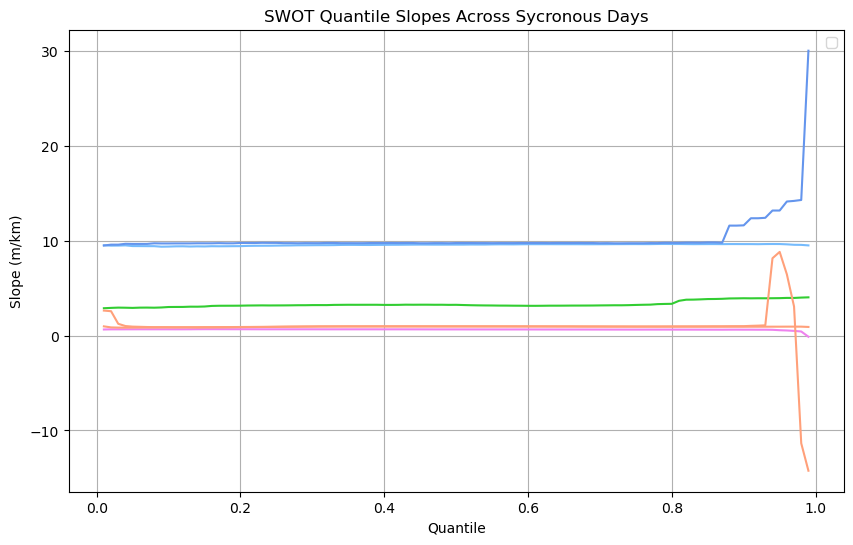

In [11]:
def plot_swot_slopes_vs_quantile(quantile_regression_results, keys_order, color_scheme_SWOT):
    plt.figure(figsize=(10, 6))

    for key in keys_order:
        # Retrieve quantile regression results
        quantiles = quantile_regression_results[key]['quantiles']
        sword_results = quantile_regression_results[key]['sword_results']

        # Extract slopes for plotting
        sword_slopes = [result[1] for result in sword_results]

        # Plotting the SWOT slopes for this key
        plt.plot(quantiles, sword_slopes, linestyle='-', color=color_scheme_SWOT[key])
    
    plt.title(f'SWOT Quantile Slopes Across Sycronous Days')
    plt.xlabel('Quantile')
    plt.ylabel('Slope (m/km)')
    plt.legend()
    plt.grid(True)
    
    #plt.savefig(f'figs/SWOT_quantile_slopes_all_keys.png', dpi=300, bbox_inches='tight')
    
    plt.show()

# Plot the SWOT quantile slopes for all keys on the same plot
plot_swot_slopes_vs_quantile(quantile_regression_results, keys_order[0:], color_scheme_SWOT)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


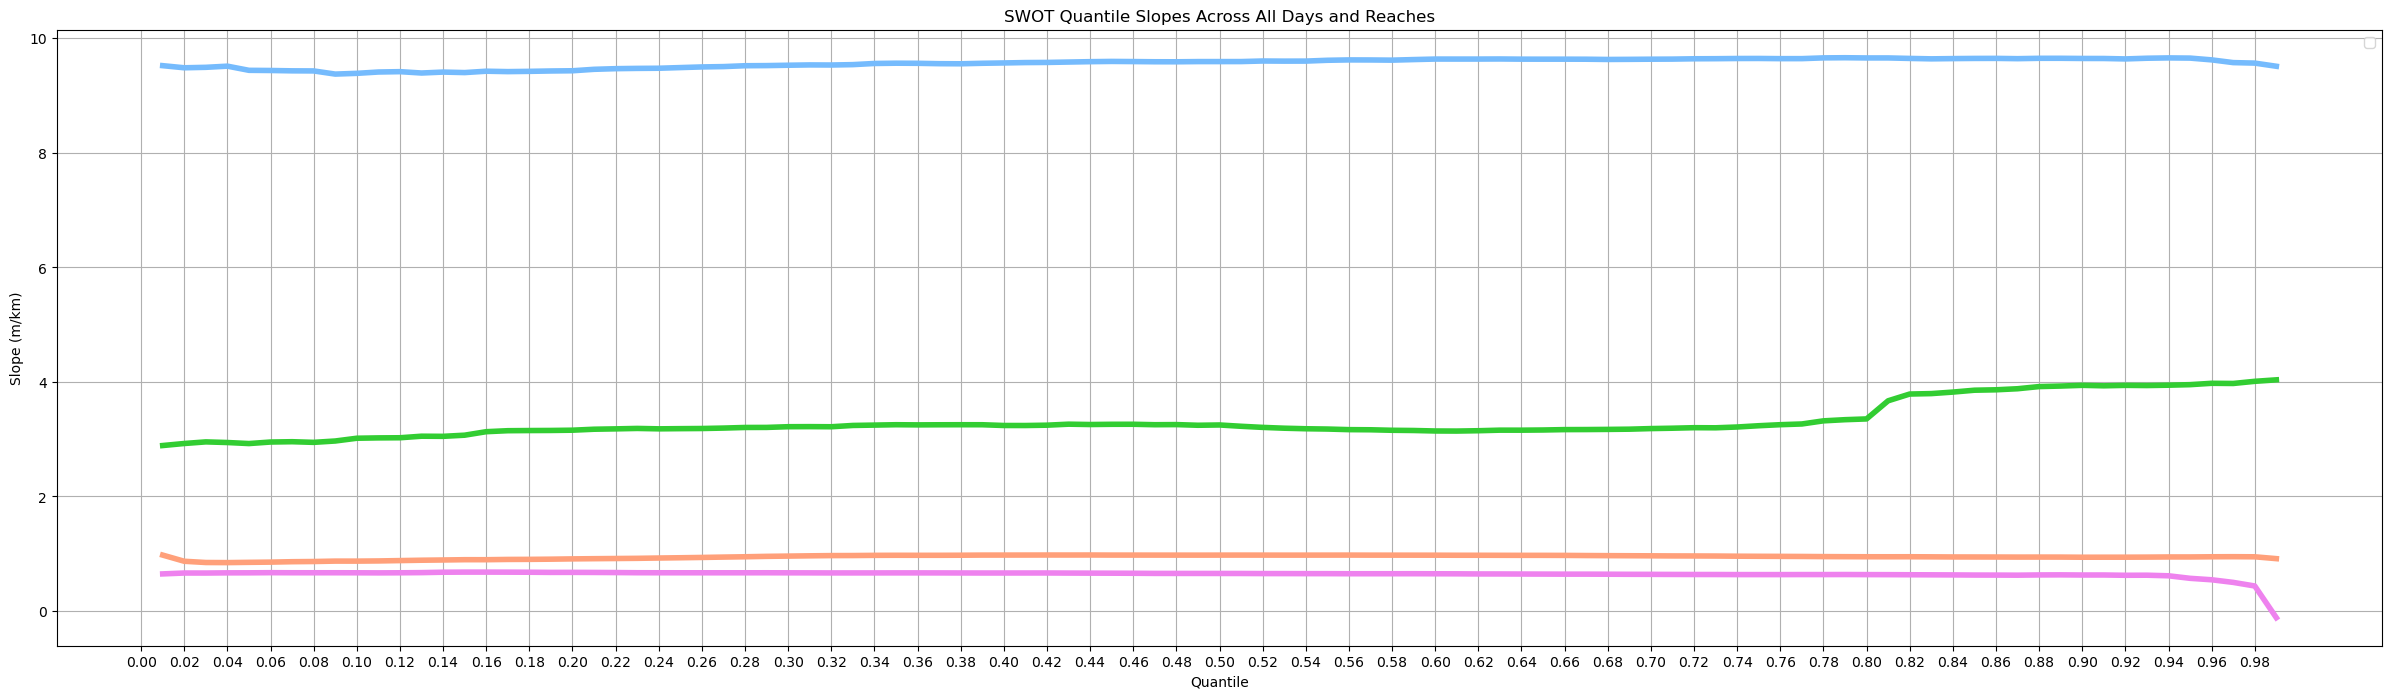

In [12]:
def plot_swot_slopes_vs_quantile(quantile_regression_results, keys_order, color_scheme_SWOT):
    plt.figure(figsize=(30, 8))

    for key in keys_order:
        # Retrieve quantile regression results
        quantiles = quantile_regression_results[key]['quantiles']
        sword_results = quantile_regression_results[key]['sword_results']

        # Extract slopes for plotting
        sword_slopes = [result[1] for result in sword_results]

        # Plotting the SWOT slopes for this key
        plt.plot(quantiles, sword_slopes, linestyle='-', color=color_scheme_SWOT[key], linewidth=4)
    
    plt.title(f'SWOT Quantile Slopes Across All Days and Reaches')
    plt.xlabel('Quantile')
    plt.ylabel('Slope (m/km)')
    plt.legend()
    plt.grid(True)

    plt.xticks(np.arange(0, 1, 0.02))
    
    plt.savefig(f'figs/SWOT_quantile_slopes_all_keys.png', dpi=300, bbox_inches='tight')
    
    plt.show()

# Plot the SWOT quantile slopes for all keys on the same plot
plot_swot_slopes_vs_quantile(quantile_regression_results, keys_order[0:4], color_scheme_SWOT)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


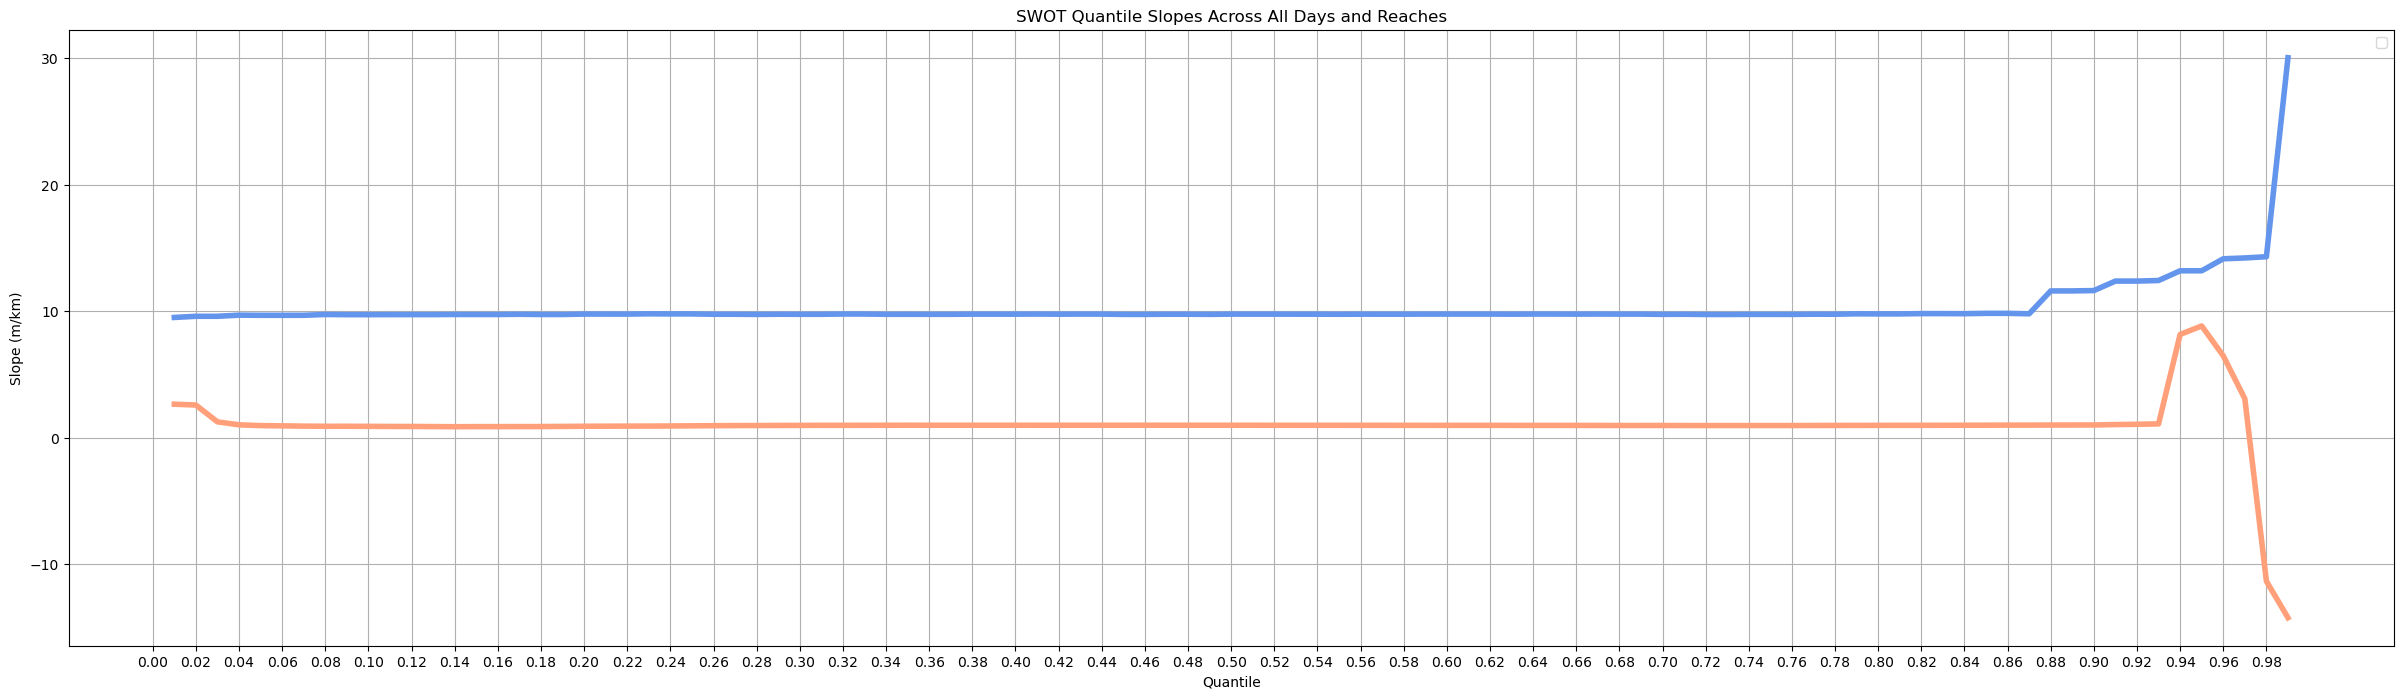

In [13]:
plot_swot_slopes_vs_quantile(quantile_regression_results, keys_order[4:], color_scheme_SWOT)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


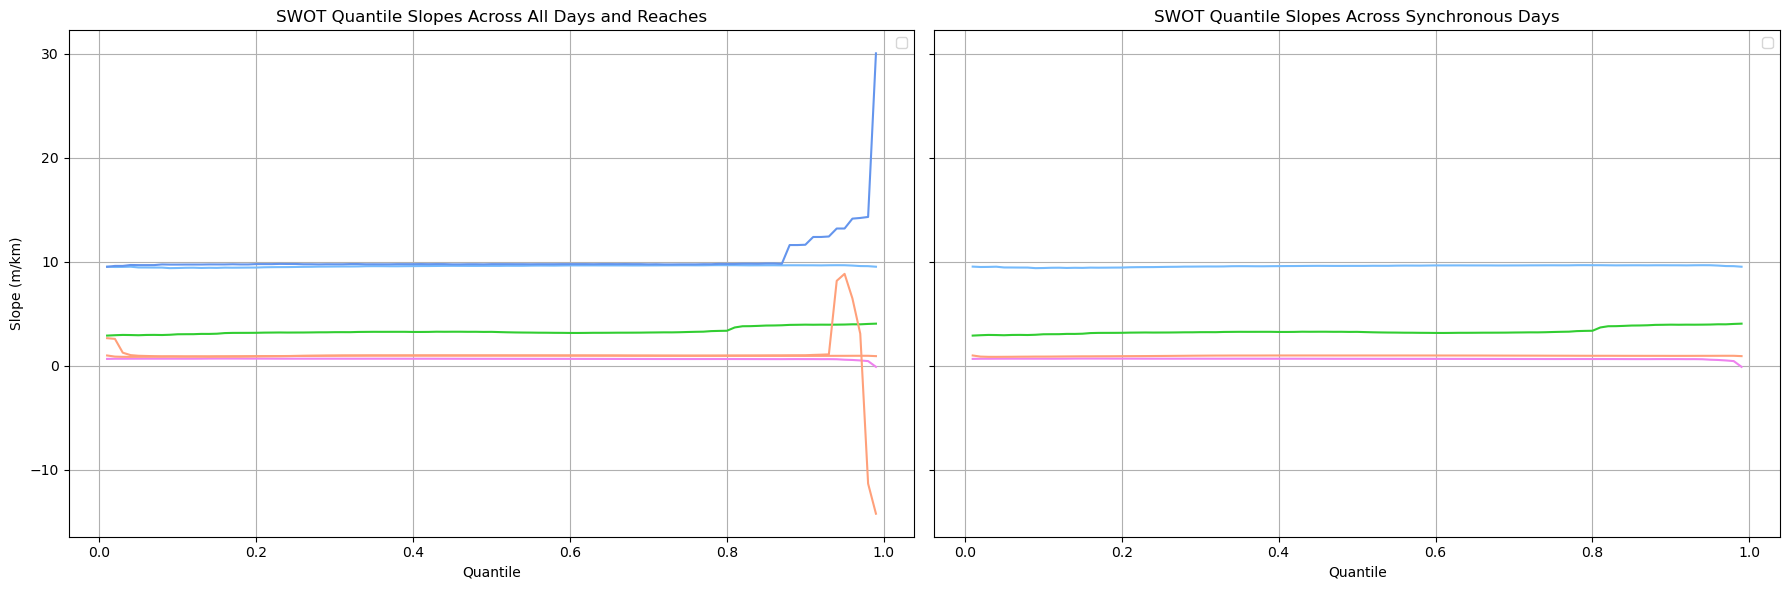

<Figure size 640x480 with 0 Axes>

In [14]:
def plot_swot_slopes_vs_quantile_side_by_side(quantile_regression_results, keys_order, color_scheme_SWOT):
    fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)

    # Plot 1: SWOT Quantile Slopes Across All Days and Reaches
    for key in keys_order:
        quantiles = quantile_regression_results[key]['quantiles']
        sword_results = quantile_regression_results[key]['sword_results']
        sword_slopes = [result[1] for result in sword_results]
        
        axes[0].plot(quantiles, sword_slopes, linestyle='-', color=color_scheme_SWOT[key])

    axes[0].set_title('SWOT Quantile Slopes Across All Days and Reaches')
    axes[0].set_xlabel('Quantile')
    axes[0].set_ylabel('Slope (m/km)')
    axes[0].legend()
    axes[0].grid(True)

    # Plot 2: SWOT Quantile Slopes Across Synchronous Days
    for key in keys_order[0:4]:  # Adjust as needed for the specific subset of keys
        quantiles = quantile_regression_results[key]['quantiles']
        sword_results = quantile_regression_results[key]['sword_results']
        sword_slopes = [result[1] for result in sword_results]
        
        axes[1].plot(quantiles, sword_slopes, linestyle='-', color=color_scheme_SWOT[key])

    axes[1].set_title('SWOT Quantile Slopes Across Synchronous Days')
    axes[1].set_xlabel('Quantile')
    axes[1].legend()
    axes[1].grid(True)

    plt.tight_layout()
    plt.show()
    plt.savefig(f'figs/SWOT_quantile_slopes_side_by_side.png', dpi=300, bbox_inches='tight')

# Plot the SWOT quantile slopes side by side
plot_swot_slopes_vs_quantile_side_by_side(quantile_regression_results, keys_order, color_scheme_SWOT)


In [15]:
# Initialize an empty list to store the RMSE values for each key
quantile_rmse_results = []

quantile_number = 50

# Loop through each key to calculate the RMSE at the 0.5 quantile level
for key in keys_order:
    # Extract the 0.5 quantile slopes for GNSS and SWORD
    gnss_slope_05 = quantile_regression_results[key]['gnss_results'][quantile_number][1]
    sword_slope_05 = quantile_regression_results[key]['sword_results'][quantile_number][1]
    
    # Calculate the RMSE between the GNSS and SWORD slopes at the 0.5 quantile level
    slope_rmse_05 = np.sqrt((gnss_slope_05 - sword_slope_05) ** 2)
    
    # Store the results in the desired structure
    quantile_rmse_results.append({
        'key': key,
        'gnss_slope': gnss_slope_05,  
        'sword_slope': sword_slope_05,
        'slope_rmse': slope_rmse_05
    })



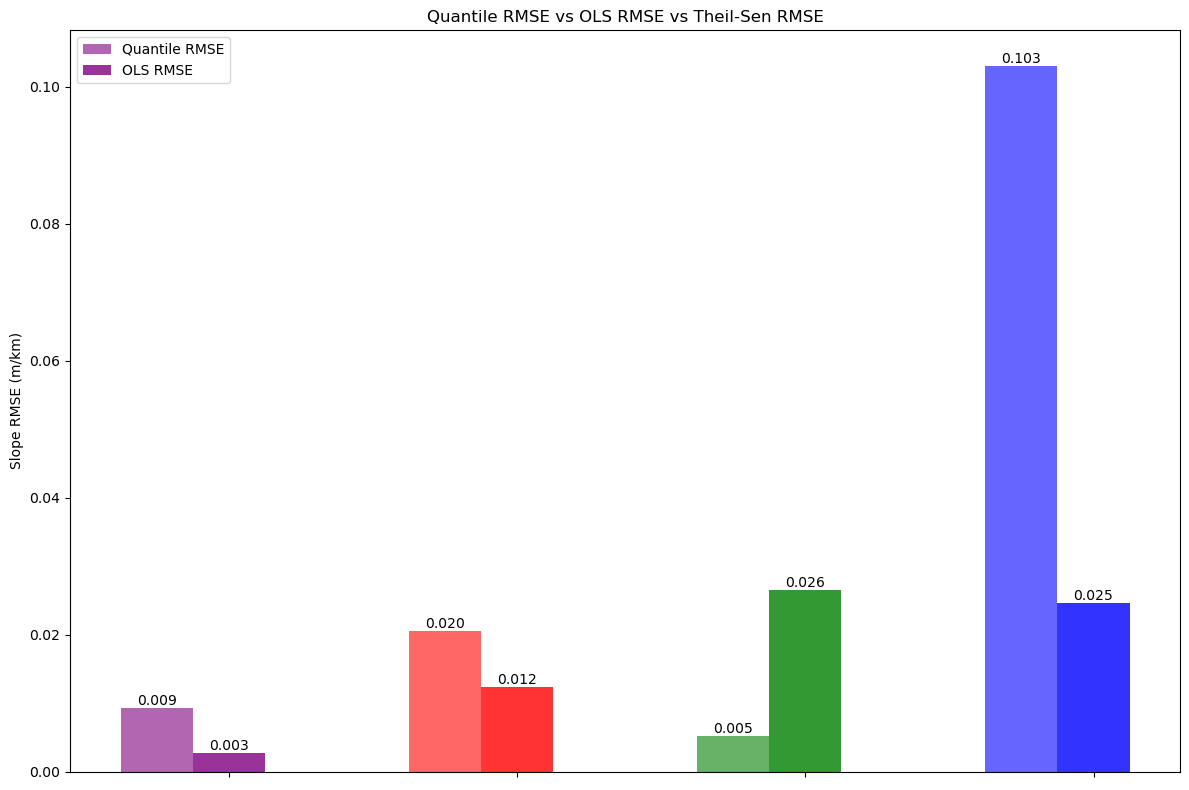

In [16]:
# Extract slopes for plotting for the first four keys
quantile_slopes = [item['slope_rmse'] for item in quantile_rmse_results[:4]]
ols_slopes = [item['slope_rmse'] for item in slope_differences_ols[:4]]
theil_sen_slopes = [item['slope_rmse'] for item in slope_differences_theil_sen[:4]]

# Create bar positions for the first four keys
bar_width = 0.25
indices = np.arange(4)  # Only for the first four keys

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

# Plot Quantile RMSE bars with lower alpha
quantile_bars = ax.bar(indices - bar_width, quantile_slopes, bar_width, label='Quantile RMSE', color=[color_scheme[key] for key in keys_order[:4]], alpha=0.6)

# Plot OLS RMSE bars with medium alpha
ols_bars = ax.bar(indices, ols_slopes, bar_width, label='OLS RMSE', color=[color_scheme[key] for key in keys_order[:4]], alpha=0.8)

# Plot Theil-Sen RMSE bars with higher alpha
#theil_sen_bars = ax.bar(indices + bar_width, theil_sen_slopes, bar_width, label='Theil-Sen RMSE', color=[color_scheme[key] for key in keys_order[:4]], alpha=1.0)


# Annotate RMSE values above each bar
for bars, slopes in zip([quantile_bars, ols_bars
                         #, theil_sen_bars
                        ], [quantile_slopes, ols_slopes
                            #, theil_sen_slopes
                           ]):
    for bar, slope in zip(bars, slopes):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{slope:.3f}', ha='center', va='bottom')



# Adding titles and labels
ax.set_title('Quantile RMSE vs OLS RMSE vs Theil-Sen RMSE')
ax.set_ylabel('Slope RMSE (m/km)')
ax.set_xticks(indices)
ax.set_xticklabels([])  # Remove x-axis labels
ax.legend()

ax.grid(False)

# Show plot
plt.tight_layout()

plt.savefig(f'figs/SWOT_vs_GNSS_RSME_bar_4.png', dpi=300, bbox_inches='tight')
plt.show()

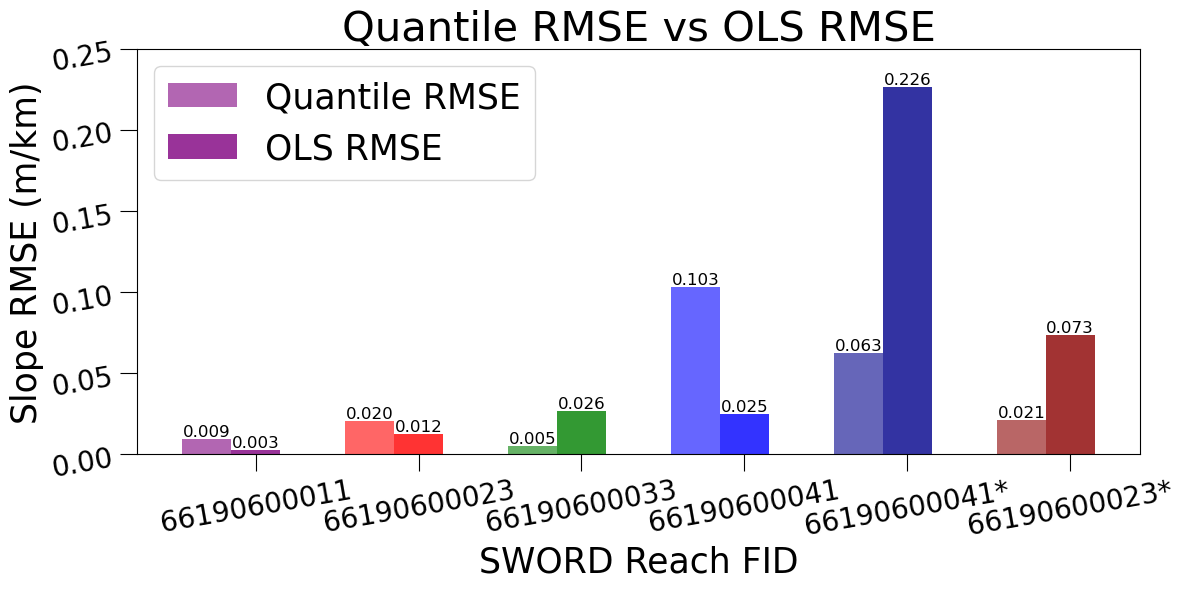

In [17]:
# Extract slopes for plotting
quantile_slopes = [item['slope_rmse'] for item in quantile_rmse_results]
ols_slopes = [item['slope_rmse'] for item in slope_differences_ols]
theil_sen_slopes = [item['slope_rmse'] for item in slope_differences_theil_sen]

# Create bar positions
bar_width = 0.3
indices = np.arange(len(keys_order))

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

# Plot Quantile RMSE bars with lower alpha
quantile_bars = ax.bar(indices - bar_width, quantile_slopes, bar_width, label='Quantile RMSE', color=[color_scheme[key] for key in keys_order], alpha=0.6)

# Plot OLS RMSE bars with medium alpha
ols_bars = ax.bar(indices, ols_slopes, bar_width, label='OLS RMSE', color=[color_scheme[key] for key in keys_order], alpha=0.8)

# Plot Theil-Sen RMSE bars with higher alpha
#theil_sen_bars = ax.bar(indices + bar_width, theil_sen_slopes, bar_width, label='Theil-Sen RMSE', color=[color_scheme[key] for key in keys_order], alpha=1.0)

# Extract numerical value from key between underscores
key_labels = []
for key in keys_order:
    key_numeric = re.search(r'_(\d+)_', str(key))
    key_labels.append(key_numeric.group(1) if key_numeric else 'Unknown')

# Add an asterisk to the last two labels
key_labels[-2:] = [label + '*' for label in key_labels[-2:]]


# Adding titles and labels
ax.set_title('Quantile RMSE vs OLS RMSE', fontsize=30)
ax.set_ylabel('Slope RMSE (m/km)', fontsize=25)
ax.set_xlabel('SWORD Reach FID', fontsize=25)
ax.set_xticks(indices)
ax.set_xticklabels(key_labels)  # Remove x-axis labels

# Annotate RMSE values above each bar
for bars, slopes in zip([quantile_bars, ols_bars
                         #, theil_sen_bars
                        ], [quantile_slopes, ols_slopes
                            #, theil_sen_slopes
                           ]):
    for bar, slope in zip(bars, slopes):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{slope:.3f}', ha='center', va='bottom', fontsize = 12)

ax.legend(fontsize=25)

plt.tick_params(axis='both', which='major', labelsize=20, size=12, labelrotation=10)
plt.ylim(0, .25)

ax.grid(False)

# Show plot
plt.tight_layout()

plt.savefig(f'publication_figs/SWOT_vs_GNSS_RSME_bar_6.png', dpi=300, bbox_inches='tight')
plt.show()

21.763901030823853
30.93034783555361
40.9507307353134
54.77953406210364
54.77953406210366
30.93034783555361


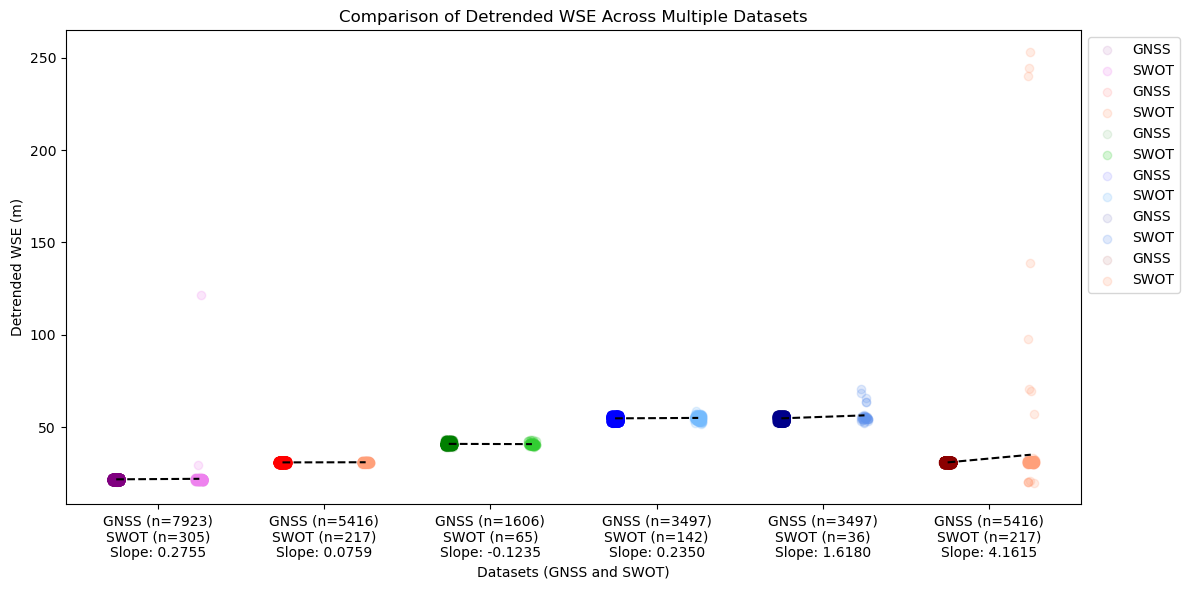

In [18]:
plt.figure(figsize=(12, 6))  # Adjust the figure size to accommodate all plots

# Lists to store the computed values for each dataset
gnss_ns = []
swot_ns = []
slopes = []

# Loop through each key in the dictionary
for key in keys_order:
    df = dataframes_dict[key].iloc[::-1].copy()  # Reverse the order and make a copy of the dataframe

    # Apply filter to keep points where classification is greater than 2
    df_filtered = apply_filter(df)

    # Create bins for every 5 meters in GNSS cumulative_distance
    bins_gnss = np.arange(0, df['cumulative_distance'].max() + 2, 2)
    bins_swot = np.arange(0, df_filtered['nearest_GNSS_dist'].max() + 50, 50)
    
    # Bin and average GNSS data
    df['binned_distance_GNSS'] = pd.cut(df['cumulative_distance'], bins=bins_gnss)
    df = df.groupby('binned_distance_GNSS', observed=True).agg({'cumulative_distance': 'mean', 'Height(m)': 'mean'}).dropna()

    # Bin and average SWOT data
    df_filtered.loc[:, 'binned_distance_SWOT'] = pd.cut(df_filtered['nearest_GNSS_dist'], bins=bins_swot)
    df_filtered = df_filtered.groupby('binned_distance_SWOT', observed=True).agg({'nearest_GNSS_dist': 'mean', 'height': 'median'}).dropna()


    # Perform linear regression for GNSS
    gnss_slope, gnss_intercept, _, _, _ = linregress(df['cumulative_distance'], df['Height(m)'])

    # Perform linear regression for SWOT
    swot_slope, swot_intercept, _, _, _ = linregress(df_filtered['nearest_GNSS_dist'], df_filtered['height'])

    # Detrend GNSS data
    df['Height_detrended'] = df['Height(m)'] - (gnss_slope * df['cumulative_distance'])

    # Detrend SWOT data
    df_filtered['height_detrended'] = df_filtered['height'] - (swot_slope * df_filtered['nearest_GNSS_dist'])

    # Combine the detrended datasets for OLS regression with dummy variables
    combined_df = pd.DataFrame({
        'Height_detrended': np.concatenate([df['Height_detrended'].values, df_filtered['height_detrended'].values]),
        'x': np.concatenate([np.zeros(len(df)), np.ones(len(df_filtered))])
    })

    # Store the calculated values
    gnss_ns.append(len(df['Height(m)']))
    swot_ns.append(len(df_filtered['height']))
    slope, intercept, _, _, _ = linregress(combined_df['x'], combined_df['Height_detrended'])
    slopes.append(slope)

    # Add jitter to x values for better visualization
    jitter_strength = 0.05
    combined_df['x_jittered'] = combined_df['x'] + np.random.uniform(-jitter_strength, jitter_strength, size=combined_df.shape[0])

    # Create scatter plot with jitter and transparency for each dataset
    plt.scatter(combined_df['x_jittered'][combined_df['x'] == 0] + keys_order.index(key) * 2, 
                combined_df['Height_detrended'][combined_df['x'] == 0], 
                label=f'GNSS', color=color_scheme[key], alpha=0.08)
    plt.scatter(combined_df['x_jittered'][combined_df['x'] == 1] + keys_order.index(key) * 2, 
                combined_df['Height_detrended'][combined_df['x'] == 1], 
                label=f'SWOT', color=color_scheme_SWOT[key], alpha=0.2)

    # Plot the OLS line for each dataset, adjusting the x positions
    x_vals = np.array([0, 1]) + keys_order.index(key) * 2
    y_vals = intercept + slope * np.array([0, 1])
    plt.plot(x_vals, y_vals, color='black', linestyle='--')
    print(intercept)

# Set x-axis ticks to include only the GNSS and SWOT n-sizes and slope
plt.xticks([i * 2 + 0.5 for i in range(len(keys_order))], 
           [f'GNSS (n={gnss_ns[i]})\nSWOT (n={swot_ns[i]})\nSlope: {slopes[i]:.4f}' 
            for i in range(len(keys_order))])

# Adding titles and labels
plt.title('Comparison of Detrended WSE Across Multiple Datasets')
plt.xlabel('Datasets (GNSS and SWOT)')
plt.ylabel('Detrended WSE (m)')

# Position the legend outside the plot for clarity
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  
plt.grid(False)

# Adjust layout to fit everything nicely
plt.tight_layout()

#save fiv
plt.savefig(f'figs/SWOT_vs_GNSS_DUMMY.png', dpi=300, bbox_inches='tight')

# Show plot
plt.show()

In [19]:
# Ensure the directory exists to save the CSV files
output_dir = 'data/quantile_filtered_csvs/'
os.makedirs(output_dir, exist_ok=True)

# Lists to store the computed values for each dataset
gnss_ns = []
swot_ns = []
slopes = []


# Loop through each key in the dictionary
for key in keys_order[0:1] + keys_order[4:]:
    df = dataframes_dict[key].iloc[::-1].copy()  # Reverse the order and make a copy of the dataframe

    # Apply filter to keep points where classification is greater than 2
    df_filtered = apply_filter(df)

    # Process GNSS data
    df_GNSS_data = pd.DataFrame({
        'y': df['Height(m)'], 
        'x': df['cumulative_distance']
    }).dropna()

    # Perform 0.5 quantile regression for GNSS
    gnss_model = smf.quantreg('y ~ x', df_GNSS_data)
    gnss_res = gnss_model.fit(q=0.5, max_iter=10000)
    gnss_slope = gnss_res.params['x']
    gnss_intercept = gnss_res.params['Intercept']

    df_SWOT_data = pd.DataFrame({
        'y': df_filtered['height'], 
        'x': df_filtered['nearest_GNSS_dist']
    }).dropna()

    # Perform 0.5 quantile regression for SWOT
    swot_model = smf.quantreg('y ~ x', df_SWOT_data)
    swot_res = swot_model.fit(q=0.5, max_iter=10000)
    swot_slope = swot_res.params['x']
    swot_intercept = swot_res.params['Intercept']

    # Detrend GNSS data using the 0.5 quantile slope
    df['Height_detrended'] = df['Height(m)'] - ((quantile_regression_results[key]['gnss_results'][quantile_number][1]/1000) * df['cumulative_distance'])

    # Detrend SWOT data
    df_filtered['height_detrended'] = df_filtered['height'] - ((quantile_regression_results[key]['sword_results'][quantile_number][1]/1000) * df_filtered['nearest_GNSS_dist'])

    # Combine the detrended datasets for OLS regression with dummy variables
    combined_df = pd.DataFrame({
        'Height_detrended': np.concatenate([df['Height_detrended'].values, df_filtered['height_detrended'].values]),
        'x': np.concatenate([np.zeros(len(df)), np.ones(len(df_filtered))])
    })

    # Store the calculated values
    gnss_ns.append(len(df['Height(m)']))
    swot_ns.append(len(df_filtered['height']))

    # Perform 0.5 quantile regression for the combined data
    both_model = smf.quantreg('Height_detrended ~ x', combined_df)
    both_res = both_model.fit(q=0.5, max_iter=10000)
    both_slope = both_res.params['x']
    both_intercept = both_res.params['Intercept']

    slopes.append(both_slope)

    # Save df and df_filtered as CSV files
    df.to_csv(f'{output_dir}/{key}_df.csv', index=False)
    df_filtered.to_csv(f'{output_dir}/{key}_df_filtered.csv', index=False)

In [20]:
df_filtered.head()

,rounded_cumulative_distance,Height(m),cumulative_distance,geometry,Datetime,latitude,longitude,height,water_frac,coherent_power,classification,missed_detection_rate,geolocation_qual,index_right,nearest_GNSS_height,nearest_GNSS_dist,nearest_index,distance_to_nearest,height_detrended
9750,10723.0,41.4533,10722.536662,POINT (713663.7482408377 5430455.936926479),2024-01-09 05:50:57.000,-41.249036,-72.449985,41.159378,0.903967,4917888.5,3.0,0.000821,8388608.0,0.0,41.4533,10722.536662,9685,6.120043,30.701004
9749,10712.0,41.4072,10711.556107,POINT (713673.1966185836 5430461.530556713),2024-01-09 05:51:00.000,-41.248838,-72.450007,41.119060,0.470110,3233262.8,3.0,0.000839,8388608.0,0.0,41.4072,10711.556107,9678,25.753042,30.671396
9747,10090.0,40.7878,10090.360505,POINT (714090.2068140836 5430886.0359485885),2024-01-09 05:55:37.000,-41.245095,-72.445018,40.533226,0.232506,2770388.2,4.0,0.000352,8388608.0,0.0,40.7878,10090.360505,9182,0.926628,30.691454
9738,9654.0,40.4744,9654.075172,POINT (714362.3818767713 5430713.989314552),2024-01-09 05:59:25.000,-41.246447,-72.441322,40.086420,0.870164,14841520.0,4.0,0.000183,8388609.0,0.0,40.4744,9654.075172,8784,34.856779,30.670185
9735,9414.0,40.4036,9414.237217,POINT (714454.0704682169 5430493.517867884),2024-01-09 06:01:37.000,-41.248525,-72.440490,41.126720,0.116447,3074740.8,6.0,0.000253,8388608.0,0.0,40.4036,9414.237217,8561,3.623894,31.944414


   Height_detrended    x  x_jittered
0         21.498492  0.0   -0.043997
1         21.510566  0.0    0.052630
2         21.502656  0.0   -0.012300
3         21.526233  0.0   -0.069068
4         21.542872  0.0    0.082653
   Height_detrended    x  x_jittered
0         56.305282  0.0    0.015745
1         55.650475  0.0   -0.022769
2         55.570447  0.0   -0.096450
3         55.839870  0.0    0.087712
4         56.215316  0.0   -0.032187
   Height_detrended    x  x_jittered
0         30.765659  0.0    0.034258
1         30.730504  0.0   -0.026298
2         30.766276  0.0    0.039609
3         30.730278  0.0    0.009226
4         30.716176  0.0    0.042934


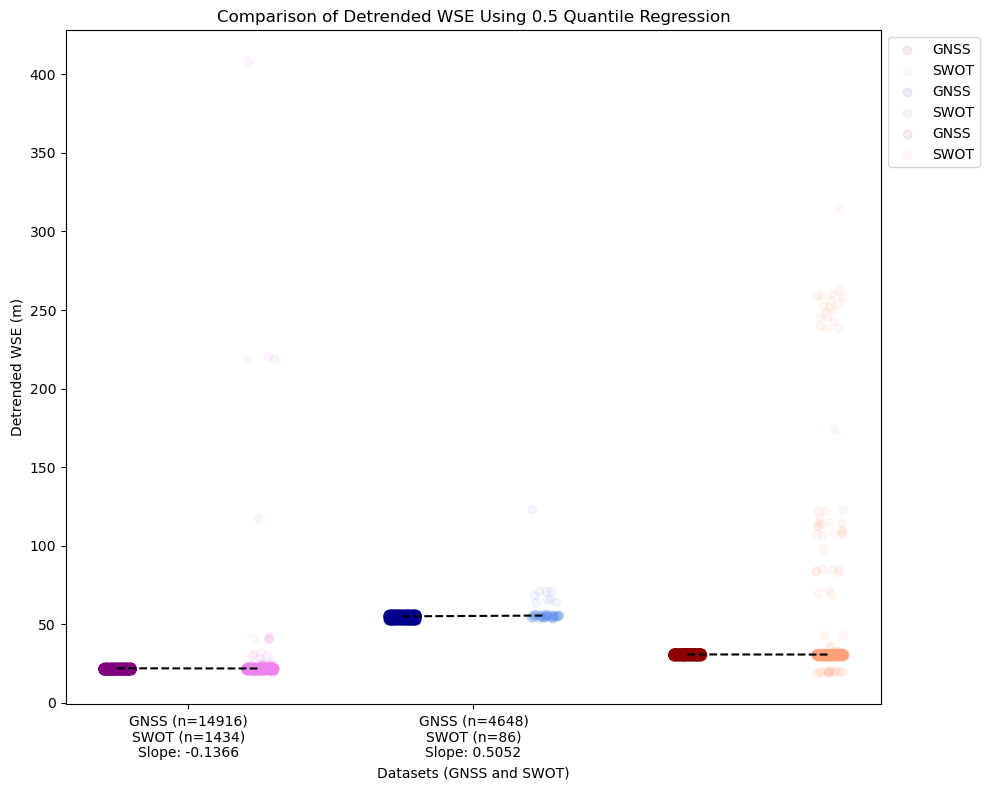

In [21]:
plt.figure(figsize=(10, 8))  # Adjust the figure size to accommodate all plots

# Lists to store the computed values for each dataset
gnss_ns = []
swot_ns = []
slopes = []

# Loop through each key in the dictionary
for i, key in enumerate(keys_order[0:1] + keys_order[4:]):
    df = dataframes_dict[key].iloc[::-1].copy()  # Reverse the order and make a copy of the dataframe

    # Apply filter to keep points where classification is greater than 2
    df_filtered = apply_filter(df)
    
    # Detrend GNSS data using the 0.5 quantile slope
    df['Height_detrended'] = df['Height(m)'] - ((quantile_regression_results[key]['gnss_results'][quantile_number][1] / 1000) * df['cumulative_distance'])

    # Detrend SWOT data
    df_filtered['height_detrended'] = df_filtered['height'] - ((quantile_regression_results[key]['sword_results'][quantile_number][1] / 1000) * df_filtered['nearest_GNSS_dist'])

    # Combine the detrended datasets for OLS regression with dummy variables
    combined_df = pd.DataFrame({
        'Height_detrended': np.concatenate([df['Height_detrended'].values, df_filtered['height_detrended'].values]),
        'x': np.concatenate([np.zeros(len(df)), np.ones(len(df_filtered))])
    })

    # Store the calculated values
    gnss_ns.append(len(df['Height(m)']))
    swot_ns.append(len(df_filtered['height']))

    # Perform 0.5 quantile regression for SWOT
    both_model = smf.quantreg('Height_detrended ~ x', combined_df)
    both_res = both_model.fit(q=0.5, max_iter=10000)
    both_slope = both_res.params['x']
    both_intercept = both_res.params['Intercept']
 
    slopes.append(both_slope)

    # Add jitter to x values for better visualization
    jitter_strength = .1
    combined_df['x_jittered'] = combined_df['x'] + np.random.uniform(-jitter_strength, jitter_strength, size=combined_df.shape[0])

    # Create scatter plot with jitter and transparency for each dataset
    plt.scatter(combined_df['x_jittered'][combined_df['x'] == 0] + i * 2, 
                combined_df['Height_detrended'][combined_df['x'] == 0], 
                label=f'GNSS', color=color_scheme[key], alpha=0.08)
    plt.scatter(combined_df['x_jittered'][combined_df['x'] == 1] + i * 2, 
                combined_df['Height_detrended'][combined_df['x'] == 1], 
                label=f'SWOT', color=color_scheme_SWOT[key], alpha=0.08)

    # Plot the OLS line for each dataset, adjusting the x positions
    x_vals = np.array([i * 2, i * 2 + 1])
    y_vals = both_intercept + both_slope * np.array([0, 1])
    plt.plot(x_vals, y_vals, color='black', linestyle='--')
    
    print(combined_df.head())
# Set x-axis ticks to include only the GNSS and SWOT n-sizes and slope
plt.xticks([i * 2 + 0.5 for i in range(len(keys_order[4:]))], 
           [f'GNSS (n={gnss_ns[i]})\nSWOT (n={swot_ns[i]})\nSlope: {slopes[i]:.4f}' 
            for i in range(len(keys_order[4:]))])

# Adding titles and labels
plt.title('Comparison of Detrended WSE Using 0.5 Quantile Regression')
plt.xlabel('Datasets (GNSS and SWOT)')
plt.ylabel('Detrended WSE (m)')

# Position the legend outside the plot for clarity
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  
plt.grid(False)

#plt.yscale('log')

# Adjust layout to fit everything nicely
plt.tight_layout()

#plt.savefig(f'figs/quantile_dummy_analysis.png', dpi=300, bbox_inches='tight')

# Show plot
plt.show()

In [22]:
# Loop through each key in the dictionary
for key in keys_order[4:]:
    # Load the saved CSV files
    print(f'{output_dir}/{key}_df.csv')

data/quantile_filtered_csvs//buffered_66190600041_20240131_GNSS_SWOT_cumulative_dist_height_df.csv
data/quantile_filtered_csvs//buffered_66190600023_20240131_GNSS_SWOT_cumulative_dist_height_df.csv


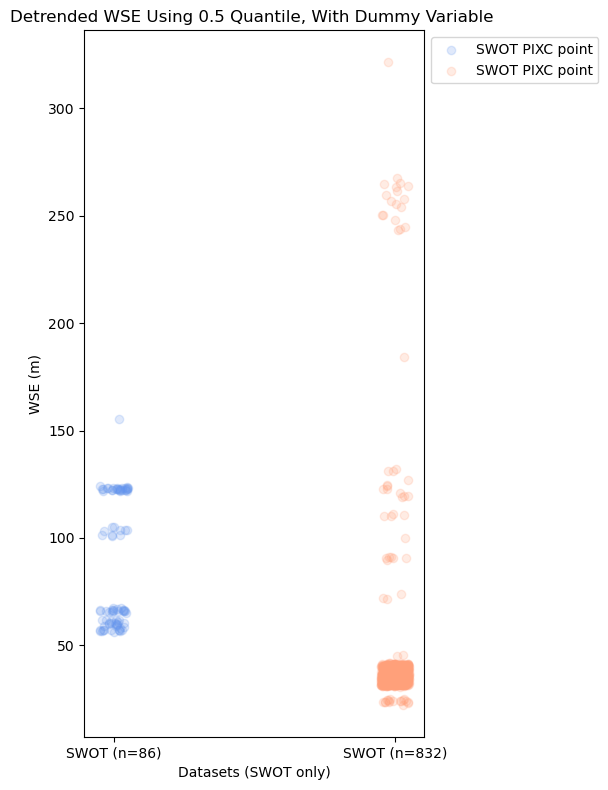

In [23]:
# Adjust the figure size to accommodate the reduced spacing
plt.figure(figsize=(6, 8))  # Reduce the width of the figure

# Lists to store the computed values for each dataset
swot_ns = []

# Process the data for each key
for i, key in enumerate(keys_order[4:]):
    df = pd.read_csv(f'{output_dir}/{key}_df.csv')
    df_filtered = pd.read_csv(f'{output_dir}/{key}_df_filtered.csv')

    # Calculate the number of SWOT data points
    non_na_SWOT = len(df_filtered['height'])

    # Add this number to the list
    swot_ns.append(non_na_SWOT)

    # Add jitter to x values for better visualization
    jitter_strength = 0.05
    df_filtered['x_jittered'] = i + np.random.uniform(-jitter_strength, jitter_strength, size=df_filtered.shape[0])

    # Create scatter plot with jitter and transparency for SWOT dataset
    plt.scatter(df_filtered['x_jittered'], df_filtered['height'], 
                label=f'SWOT PIXC point', color=color_scheme_SWOT[key], alpha=0.2)

# Set x-axis ticks to include only the SWOT n-sizes, adjusted for tighter spacing
plt.xticks([i for i in range(len(keys_order[4:]))], 
           [f'SWOT (n={swot_ns[i]})' for i in range(len(keys_order[4:]))])

# Adding titles and labels
plt.title('Detrended WSE Using 0.5 Quantile, With Dummy Variable ')
plt.xlabel('Datasets (SWOT only)')
plt.ylabel('WSE (m)')

# Position the legend outside the plot for clarity
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  
plt.grid(False)

# Adjust layout to fit everything nicely
plt.tight_layout()

# Save the plot
plt.savefig(f'figs/Both_only_visualization.png', dpi=300, bbox_inches='tight')

# Show plot
plt.show()

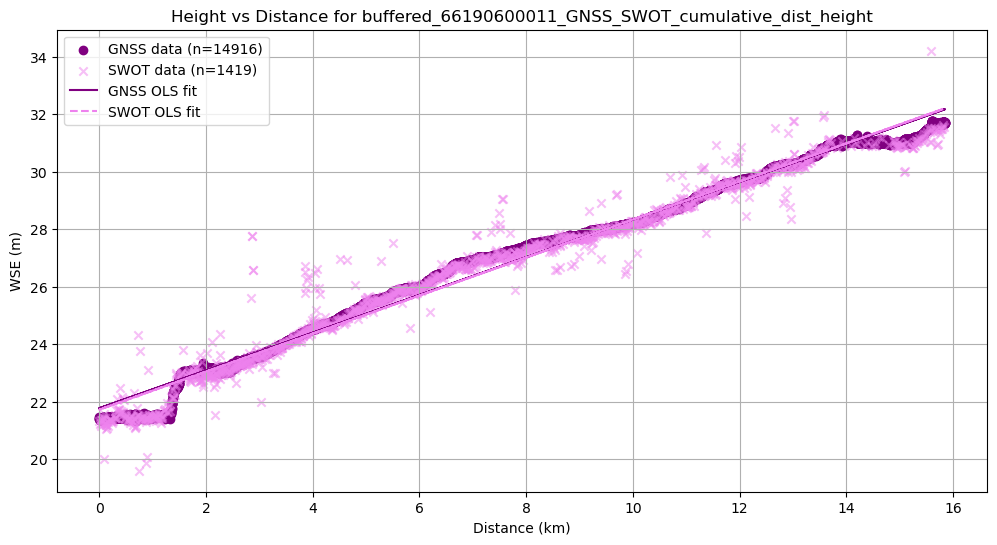

In [24]:
plt.figure(figsize=(12, 6))  # Adjust the figure size to accommodate all plots

# Loop through each key in the dictionary
for key in keys_order[0:1]:
    # Load the saved CSV files
    df = pd.read_csv(f'{output_dir}/{key}_df.csv')
    df_filtered = pd.read_csv(f'{output_dir}/{key}_df_filtered.csv')

    # Calculate the 0.06 and 0.90 percentiles for 'height_detrended'
    lower_bound = df_filtered['height_detrended'].quantile(0.00)
    upper_bound = df_filtered['height_detrended'].quantile(.99)

    # Filter the DataFrame to keep only the rows within the 0.06 to 0.90 percentiles
    df_filtered_quantile = df_filtered[(df_filtered['height_detrended'] >= lower_bound) & 
                                       (df_filtered['height_detrended'] <= upper_bound)]

    # Determine the number of non-NA GNSS and SWOT data points
    non_na_gnss = df['Height(m)'].notna().sum()
    non_na_SWOT = df_filtered_quantile['height'].notna().sum()

    # OLS regression for GNSS data
    gnss_slope, gnss_intercept, _, _, _ = linregress(df['cumulative_distance'], df['Height(m)'])

    # OLS regression for SWOT data within quantile range
    swot_slope, swot_intercept, _, _, _ = linregress(df_filtered_quantile['nearest_GNSS_dist'], df_filtered_quantile['height'])

    # Scatter plot for cumulative_distance_GNSS vs GNSS_height
    plt.scatter(df['cumulative_distance'] / 1000, df['Height(m)'], 
                label=f'GNSS data (n={non_na_gnss})', marker='o', color=color_scheme[key])

    # Scatter plot for cumulative_distance_SWOT vs SWOT_height
    plt.scatter(df_filtered_quantile['nearest_GNSS_dist'] / 1000, df_filtered_quantile['height'], 
                label=f'SWOT data (n={non_na_SWOT})', alpha=0.5, marker='x', color=color_scheme_SWOT[key])

    # OLS line for GNSS data
    plt.plot(df['cumulative_distance'] / 1000, gnss_slope * df['cumulative_distance'] + gnss_intercept, 
             color=color_scheme[key], linestyle='-', label='GNSS OLS fit')

    # OLS line for SWOT data
    plt.plot(df_filtered_quantile['nearest_GNSS_dist'] / 1000, 
             swot_slope * df_filtered_quantile['nearest_GNSS_dist'] + swot_intercept, 
             color=color_scheme_SWOT[key], linestyle='--', label='SWOT OLS fit')

    # Adding titles and labels
    plt.title(f'Height vs Distance for {key}')
    plt.xlabel('Distance (km)')
    plt.ylabel('WSE (m)')
    plt.legend()
    plt.grid(True)

    plt.savefig(f'figs/Blue_wse.png', dpi=300, bbox_inches='tight')

    # Show plot
    plt.show()

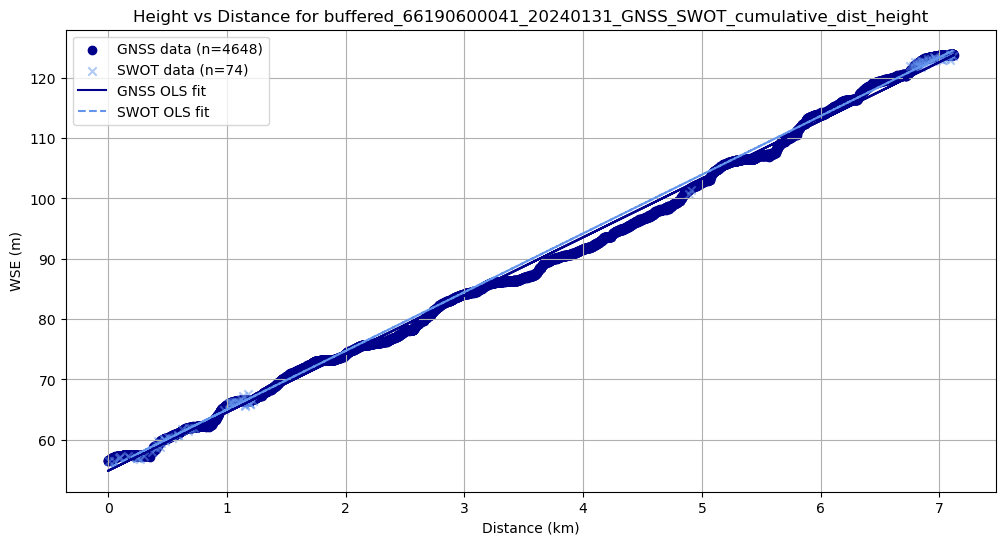

In [25]:
plt.figure(figsize=(12, 6))  # Adjust the figure size to accommodate all plots

# Loop through each key in the dictionary
for key in keys_order[4:5]:
    # Load the saved CSV files
    df = pd.read_csv(f'{output_dir}/{key}_df.csv')
    df_filtered = pd.read_csv(f'{output_dir}/{key}_df_filtered.csv')

    # Calculate the 0.06 and 0.90 percentiles for 'height_detrended'
    lower_bound = df_filtered['height_detrended'].quantile(0.00)
    upper_bound = df_filtered['height_detrended'].quantile(0.87)

    # Filter the DataFrame to keep only the rows within the 0.06 to 0.90 percentiles
    df_filtered_quantile = df_filtered[(df_filtered['height_detrended'] >= lower_bound) & 
                                       (df_filtered['height_detrended'] <= upper_bound)]

    # Determine the number of non-NA GNSS and SWOT data points
    non_na_gnss = df['Height(m)'].notna().sum()
    non_na_SWOT = df_filtered_quantile['height'].notna().sum()

    # OLS regression for GNSS data
    gnss_slope, gnss_intercept, _, _, _ = linregress(df['cumulative_distance'], df['Height(m)'])

    # OLS regression for SWOT data within quantile range
    swot_slope, swot_intercept, _, _, _ = linregress(df_filtered_quantile['nearest_GNSS_dist'], df_filtered_quantile['height'])

    # Scatter plot for cumulative_distance_GNSS vs GNSS_height
    plt.scatter(df['cumulative_distance'] / 1000, df['Height(m)'], 
                label=f'GNSS data (n={non_na_gnss})', marker='o', color=color_scheme[key])

    # Scatter plot for cumulative_distance_SWOT vs SWOT_height
    plt.scatter(df_filtered_quantile['nearest_GNSS_dist'] / 1000, df_filtered_quantile['height'], 
                label=f'SWOT data (n={non_na_SWOT})', alpha=0.5, marker='x', color=color_scheme_SWOT[key])

    # OLS line for GNSS data
    plt.plot(df['cumulative_distance'] / 1000, gnss_slope * df['cumulative_distance'] + gnss_intercept, 
             color=color_scheme[key], linestyle='-', label='GNSS OLS fit')

    # OLS line for SWOT data
    plt.plot(df_filtered_quantile['nearest_GNSS_dist'] / 1000, 
             swot_slope * df_filtered_quantile['nearest_GNSS_dist'] + swot_intercept, 
             color=color_scheme_SWOT[key], linestyle='--', label='SWOT OLS fit')

    # Adding titles and labels
    plt.title(f'Height vs Distance for {key}')
    plt.xlabel('Distance (km)')
    plt.ylabel('WSE (m)')
    plt.legend()
    plt.grid(True)

    plt.savefig(f'figs/Blue_wse.png', dpi=300, bbox_inches='tight')

    # Show plot
    plt.show()

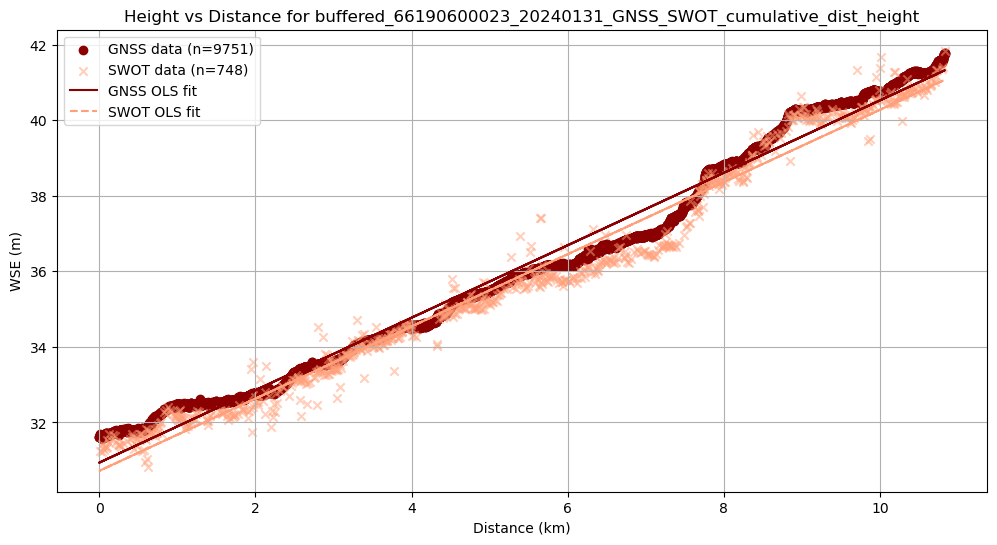

In [26]:
plt.figure(figsize=(12, 6))  # Adjust the figure size to accommodate all plots

# Loop through each key in the dictionary
for key in keys_order[5:]:
    # Load the saved CSV files
    df = pd.read_csv(f'{output_dir}/{key}_df.csv')
    df_filtered = pd.read_csv(f'{output_dir}/{key}_df_filtered.csv')

    # Calculate the 0.06 and 0.90 percentiles for 'height_detrended'
    lower_bound = df_filtered['height_detrended'].quantile(0.03)
    upper_bound = df_filtered['height_detrended'].quantile(0.93)

    # Filter the DataFrame to keep only the rows within the 0.06 to 0.90 percentiles
    df_filtered_quantile = df_filtered[(df_filtered['height_detrended'] >= lower_bound) & 
                                       (df_filtered['height_detrended'] <= upper_bound)]

    # Determine the number of non-NA GNSS and SWOT data points
    non_na_gnss = df['Height(m)'].notna().sum()
    non_na_SWOT = df_filtered_quantile['height'].notna().sum()

    # OLS regression for GNSS data
    gnss_slope, gnss_intercept, _, _, _ = linregress(df['cumulative_distance'], df['Height(m)'])

    # OLS regression for SWOT data within quantile range
    swot_slope, swot_intercept, _, _, _ = linregress(df_filtered_quantile['nearest_GNSS_dist'], df_filtered_quantile['height'])

    # Scatter plot for cumulative_distance_GNSS vs GNSS_height
    plt.scatter(df['cumulative_distance'] / 1000, df['Height(m)'], 
                label=f'GNSS data (n={non_na_gnss})', marker='o', color=color_scheme[key])

    # Scatter plot for cumulative_distance_SWOT vs SWOT_height
    plt.scatter(df_filtered_quantile['nearest_GNSS_dist'] / 1000, df_filtered_quantile['height'], 
                label=f'SWOT data (n={non_na_SWOT})', alpha=0.5, marker='x', color=color_scheme_SWOT[key])

    # OLS line for GNSS data
    plt.plot(df['cumulative_distance'] / 1000, gnss_slope * df['cumulative_distance'] + gnss_intercept, 
             color=color_scheme[key], linestyle='-', label='GNSS OLS fit')

    # OLS line for SWOT data
    plt.plot(df_filtered_quantile['nearest_GNSS_dist'] / 1000, 
             swot_slope * df_filtered_quantile['nearest_GNSS_dist'] + swot_intercept, 
             color=color_scheme_SWOT[key], linestyle='--', label='SWOT OLS fit')

    # Adding titles and labels
    plt.title(f'Height vs Distance for {key}')
    plt.xlabel('Distance (km)')
    plt.ylabel('WSE (m)')
    plt.legend()
    plt.grid(True)

    plt.savefig(f'figs/Red_wse.png', dpi=300, bbox_inches='tight')

    # Show plot
    plt.show()

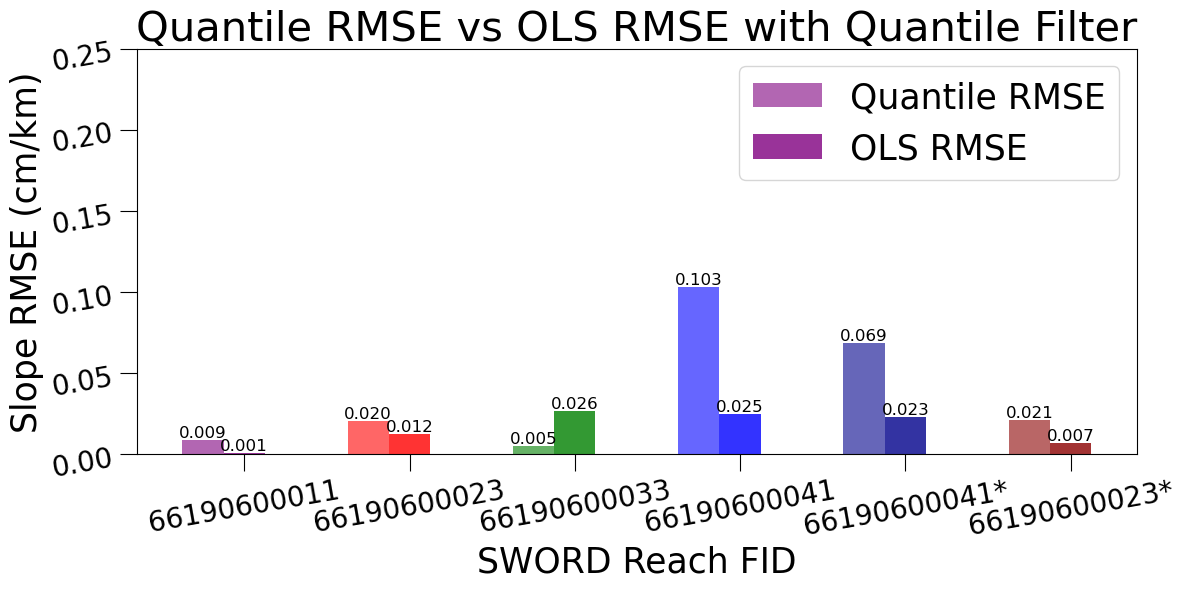

In [63]:
# Extract slopes for plotting for the first four keys
quantile_slopes = [item['slope_rmse'] for item in quantile_rmse_results[:4]] + [0, 0]
ols_slopes = [item['slope_rmse'] for item in slope_differences_ols[:4]] + [0, 0]
theil_sen_slopes = [item['slope_rmse'] for item in slope_differences_theil_sen[:4]] + [0, 0]

ols_slope_swot = [item['sword_slope'] for item in slope_differences_ols[:4]] + [0, 0]

# # Add placeholders for the last two keys
# quantile_slopes.extend([0, 0])  # Update later
# ols_slopes.extend([0, 0])       # Update later
# theil_sen_slopes.extend([0, 0])
# ols_slope_swot.extend([0, 0])# Update later

# Process the last two keys with different quantile ranges
for i, key in enumerate(keys_order[0:1] + keys_order[4:]):
    df = pd.read_csv(f'{output_dir}/{key}_df.csv')
    df_filtered = pd.read_csv(f'{output_dir}/{key}_df_filtered.csv') 

    # Set different quantile ranges for each dataset
    if key == 'buffered_66190600041_20240131_GNSS_SWOT_cumulative_dist_height':
        lower_bound = df_filtered['height_detrended'].quantile(0.00)
        upper_bound = df_filtered['height_detrended'].quantile(0.83)
    elif key == 'buffered_66190600023_20240131_GNSS_SWOT_cumulative_dist_height':
        lower_bound = df_filtered['height_detrended'].quantile(0.04)
        upper_bound = df_filtered['height_detrended'].quantile(0.93)
    elif key == 'buffered_66190600011_GNSS_SWOT_cumulative_dist_height':
        lower_bound = df_filtered['height_detrended'].quantile(0.00)
        upper_bound = df_filtered['height_detrended'].quantile(0.99)

    # Filter the DataFrame to keep only the rows within the specified quantile range
    df_filtered_quantile = df_filtered[(df_filtered['height_detrended'] >= lower_bound) & 
                                       (df_filtered['height_detrended'] <= upper_bound)]

    # Create bins for every 5 meters in GNSS cumulative_distance
    bins_gnss = np.arange(0, df['cumulative_distance'].max() + 2, 2)
    bins_swot = np.arange(0, df_filtered_quantile['nearest_GNSS_dist'].max() + 50, 50)
    
    # Bin and average GNSS data
    df['binned_distance_GNSS'] = pd.cut(df['cumulative_distance'], bins=bins_gnss)
    df_binned_gnss = df.groupby('binned_distance_GNSS', observed=True).agg({'cumulative_distance': 'median', 'Height(m)': 'median'}).dropna()

    # Bin and average SWOT data
    df_filtered_quantile = df_filtered_quantile.copy() #This supresses a SettingWithCopyWarning
    df_filtered_quantile.loc[:, 'binned_distance_SWOT'] = pd.cut(df_filtered_quantile['nearest_GNSS_dist'], bins=bins_swot)
    df_binned_swot = df_filtered_quantile.groupby('binned_distance_SWOT', observed=True).agg({'nearest_GNSS_dist': 'median', 'height': 'median'}).dropna()
    
    # Perform OLS regression for GNSS
    gnss_slope_ols, gnss_intercept_ols, _, _, _ = linregress(df_binned_gnss['cumulative_distance'], df_binned_gnss['Height(m)'])

    # Perform OLS regression for SWOT
    swot_slope_ols, swot_intercept_ols, _, _, _ = linregress(df_binned_swot['nearest_GNSS_dist'], df_binned_swot['height'])

    # Calculate OLS RMSE
    ols_rmse = np.sqrt(np.mean((gnss_slope_ols * 1000 - swot_slope_ols * 1000) ** 2))
    

    # Replace the first element in ols_slopes if processing keys_order[0]
    if i == 0:  # For keys_order[0]
        ols_slopes[0] = ols_rmse
        ols_slope_swot[0] = swot_slope_ols*1000
    else:  # For the remaining keys
        ols_slopes[4 + (i - 1)] = ols_rmse
        ols_slope_swot[4 + (i - 1)] = swot_slope_ols *1000



    
    

    # Perform 0.5 quantile regression for GNSS
    df_GNSS_data = pd.DataFrame({
        'y': df['Height(m)'], 
        'x': df['cumulative_distance']
    }).dropna()

    gnss_model = smf.quantreg('y ~ x', df_GNSS_data)
    gnss_res = gnss_model.fit(q=0.5, max_iter=10000)
    gnss_slope = gnss_res.params['x']

    # Perform 0.5 quantile regression for SWOT
    df_SWOT_data = pd.DataFrame({
        'y': df_filtered['height'], 
        'x': df_filtered['nearest_GNSS_dist']
    }).dropna()

    swot_model = smf.quantreg('y ~ x', df_SWOT_data)
    swot_res = swot_model.fit(q=0.5, max_iter=10000)
    swot_slope = swot_res.params['x']

    quantile_rmse = np.sqrt(np.mean((gnss_slope * 1000 - swot_slope * 1000) ** 2))

    # Replace the first element in quantile_slopes if processing keys_order[0]
    if i == 0:  # For keys_order[0]
        quantile_slopes[0] = quantile_rmse
    else:  # For the remaining keys
        quantile_slopes[4 + (i - 1)] = quantile_rmse

# Create bar positions
bar_width = 0.25
indices = np.arange(6)  # Total 6 bars (4 initial + 2 new)

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

# Plot Quantile RMSE bars with lower alpha
quantile_bars = ax.bar(indices - bar_width, quantile_slopes, bar_width, label='Quantile RMSE', color=[color_scheme[key] for key in keys_order], alpha=0.6)

# Plot OLS RMSE bars with medium alpha
ols_bars = ax.bar(indices, ols_slopes, bar_width, label='OLS RMSE', color=[color_scheme[key] for key in keys_order], alpha=0.8)

# Plot Theil-Sen RMSE bars with higher alpha
# theil_sen_bars = ax.bar(indices + bar_width, theil_sen_slopes, bar_width, label='Theil-Sen RMSE', color=[color_scheme[key] for key in keys_order], alpha=1.0)

# Adding titles and labels
ax.set_title('Quantile RMSE vs OLS RMSE with Quantile Filter', fontsize=30)
ax.set_ylabel('Slope RMSE (cm/km)', fontsize=25)
ax.set_xlabel('SWORD Reach FID', fontsize=25)
ax.set_xticks(indices)
ax.set_xticklabels(key_labels)

# Annotate RMSE values above each bar
for bars, slopes in zip([quantile_bars, ols_bars
                         # , theil_sen_bars
                        ], [quantile_slopes, ols_slopes
                            # , theil_sen_slopes
                           ]):
    for bar, slope in zip(bars, slopes):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{slope:.3f}', ha='center', va='bottom', fontsize=12)

ax.legend(fontsize=25)
ax.grid(False)

plt.ylim(0, .25)

plt.tick_params(axis='both', which='major', labelsize=20, size=12, labelrotation=10)

# Show plot
plt.tight_layout()

# Save the plot
plt.savefig(f'publication_figs/SWOT_vs_GNSS_RSME_bar_filtered.png', dpi=300, bbox_inches='tight')
plt.show()


In [65]:
slope_differences_ols

[{'key': 'buffered_66190600011_GNSS_SWOT_cumulative_dist_height',
  'gnss_slope': 0.6570097982758509,
  'sword_slope': 0.6596785765779879,
  'slope_rmse': 0.002668778302136965},
 {'key': 'buffered_66190600023_GNSS_SWOT_cumulative_dist_height',
  'gnss_slope': 0.959860029749318,
  'sword_slope': 0.9475743184162692,
  'slope_rmse': 0.012285711333048788},
 {'key': 'buffered_66190600033_GNSS_SWOT_cumulative_dist_height',
  'gnss_slope': 3.496075455240846,
  'sword_slope': 3.522573408407117,
  'slope_rmse': 0.026497953166270793},
 {'key': 'buffered_66190600041_GNSS_SWOT_cumulative_dist_height',
  'gnss_slope': 9.671798520548359,
  'sword_slope': 9.647164843098924,
  'slope_rmse': 0.0246336774494349},
 {'key': 'buffered_66190600041_20240131_GNSS_SWOT_cumulative_dist_height',
  'gnss_slope': 9.671798520548359,
  'sword_slope': 9.898132162110063,
  'slope_rmse': 0.22633364156170366},
 {'key': 'buffered_66190600023_20240131_GNSS_SWOT_cumulative_dist_height',
  'gnss_slope': 0.959860029749318,
 

In [60]:
[item['slope_rmse'] for item in slope_differences_ols]

[0.002668778302136965,
 0.012285711333048788,
 0.026497953166270793,
 0.0246336774494349,
 0.22633364156170366,
 0.0734812676885438]

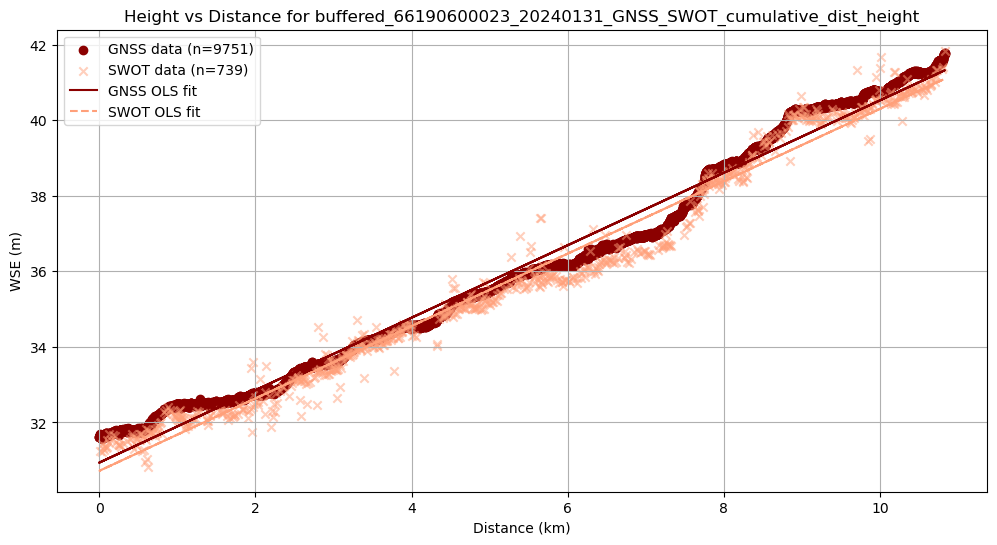

In [28]:
plt.figure(figsize=(12, 6))  # Adjust the figure size to accommodate all plots

# Loop through each key in the dictionary
for key in keys_order[5:]:
    # Load the saved CSV files
    df = pd.read_csv(f'{output_dir}/{key}_df.csv')
    df_filtered = pd.read_csv(f'{output_dir}/{key}_df_filtered.csv')

    # Calculate the 0.06 and 0.90 percentiles for 'height_detrended'
    lower_bound = df_filtered['height_detrended'].quantile(0.04)
    upper_bound = df_filtered['height_detrended'].quantile(0.93)

    # Filter the DataFrame to keep only the rows within the 0.06 to 0.90 percentiles
    df_filtered_quantile = df_filtered[(df_filtered['height_detrended'] >= lower_bound) & 
                                       (df_filtered['height_detrended'] <= upper_bound)]

    # Determine the number of non-NA GNSS and SWOT data points
    non_na_gnss = df['Height(m)'].notna().sum()
    non_na_SWOT = df_filtered_quantile['height'].notna().sum()

    # OLS regression for GNSS data
    gnss_slope, gnss_intercept, _, _, _ = linregress(df['cumulative_distance'], df['Height(m)'])

    # OLS regression for SWOT data within quantile range
    swot_slope, swot_intercept, _, _, _ = linregress(df_filtered_quantile['nearest_GNSS_dist'], df_filtered_quantile['height'])

    # Scatter plot for cumulative_distance_GNSS vs GNSS_height
    plt.scatter(df['cumulative_distance'] / 1000, df['Height(m)'], 
                label=f'GNSS data (n={non_na_gnss})', marker='o', color=color_scheme[key])

    # Scatter plot for cumulative_distance_SWOT vs SWOT_height
    plt.scatter(df_filtered_quantile['nearest_GNSS_dist'] / 1000, df_filtered_quantile['height'], 
                label=f'SWOT data (n={non_na_SWOT})', alpha=0.5, marker='x', color=color_scheme_SWOT[key])

    # OLS line for GNSS data
    plt.plot(df['cumulative_distance'] / 1000, gnss_slope * df['cumulative_distance'] + gnss_intercept, 
             color=color_scheme[key], linestyle='-', label='GNSS OLS fit')

    # OLS line for SWOT data
    plt.plot(df_filtered_quantile['nearest_GNSS_dist'] / 1000, 
             swot_slope * df_filtered_quantile['nearest_GNSS_dist'] + swot_intercept, 
             color=color_scheme_SWOT[key], linestyle='--', label='SWOT OLS fit')

    # Adding titles and labels
    plt.title(f'Height vs Distance for {key}')
    plt.xlabel('Distance (km)')
    plt.ylabel('WSE (m)')
    plt.legend()
    plt.grid(True)

    # Show plot
    plt.show()

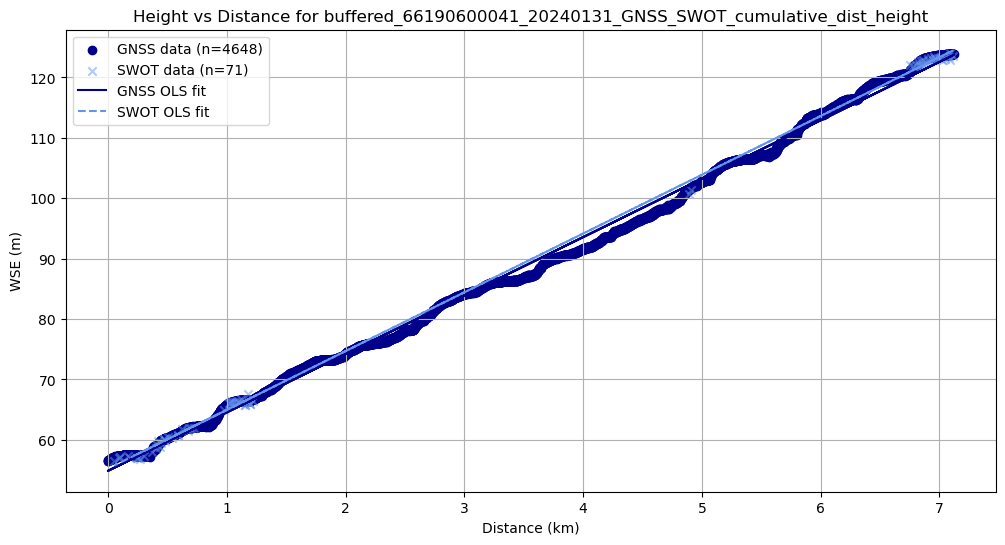

In [29]:
plt.figure(figsize=(12, 6))  # Adjust the figure size to accommodate all plots

# Loop through each key in the dictionary
for key in keys_order[4:5]:
    # Load the saved CSV files
    df = pd.read_csv(f'{output_dir}/{key}_df.csv')
    df_filtered = pd.read_csv(f'{output_dir}/{key}_df_filtered.csv')

    # Calculate the 0.06 and 0.90 percentiles for 'height_detrended'
    lower_bound = df_filtered['height_detrended'].quantile(0.00)
    upper_bound = df_filtered['height_detrended'].quantile(0.83)

    # Filter the DataFrame to keep only the rows within the 0.06 to 0.90 percentiles
    df_filtered_quantile = df_filtered[(df_filtered['height_detrended'] >= lower_bound) & 
                                       (df_filtered['height_detrended'] <= upper_bound)]

    # Determine the number of non-NA GNSS and SWOT data points
    non_na_gnss = df['Height(m)'].notna().sum()
    non_na_SWOT = df_filtered_quantile['height'].notna().sum()

    # OLS regression for GNSS data
    gnss_slope, gnss_intercept, _, _, _ = linregress(df['cumulative_distance'], df['Height(m)'])

    # OLS regression for SWOT data within quantile range
    swot_slope, swot_intercept, _, _, _ = linregress(df_filtered_quantile['nearest_GNSS_dist'], df_filtered_quantile['height'])

    # Scatter plot for cumulative_distance_GNSS vs GNSS_height
    plt.scatter(df['cumulative_distance'] / 1000, df['Height(m)'], 
                label=f'GNSS data (n={non_na_gnss})', marker='o', color=color_scheme[key])

    # Scatter plot for cumulative_distance_SWOT vs SWOT_height
    plt.scatter(df_filtered_quantile['nearest_GNSS_dist'] / 1000, df_filtered_quantile['height'], 
                label=f'SWOT data (n={non_na_SWOT})', alpha=0.5, marker='x', color=color_scheme_SWOT[key])

    # OLS line for GNSS data
    plt.plot(df['cumulative_distance'] / 1000, gnss_slope * df['cumulative_distance'] + gnss_intercept, 
             color=color_scheme[key], linestyle='-', label='GNSS OLS fit')

    # OLS line for SWOT data
    plt.plot(df_filtered_quantile['nearest_GNSS_dist'] / 1000, 
             swot_slope * df_filtered_quantile['nearest_GNSS_dist'] + swot_intercept, 
             color=color_scheme_SWOT[key], linestyle='--', label='SWOT OLS fit')

    # Adding titles and labels
    plt.title(f'Height vs Distance for {key}')
    plt.xlabel('Distance (km)')
    plt.ylabel('WSE (m)')
    plt.legend()
    plt.grid(True)

    # Show plot
    plt.show()

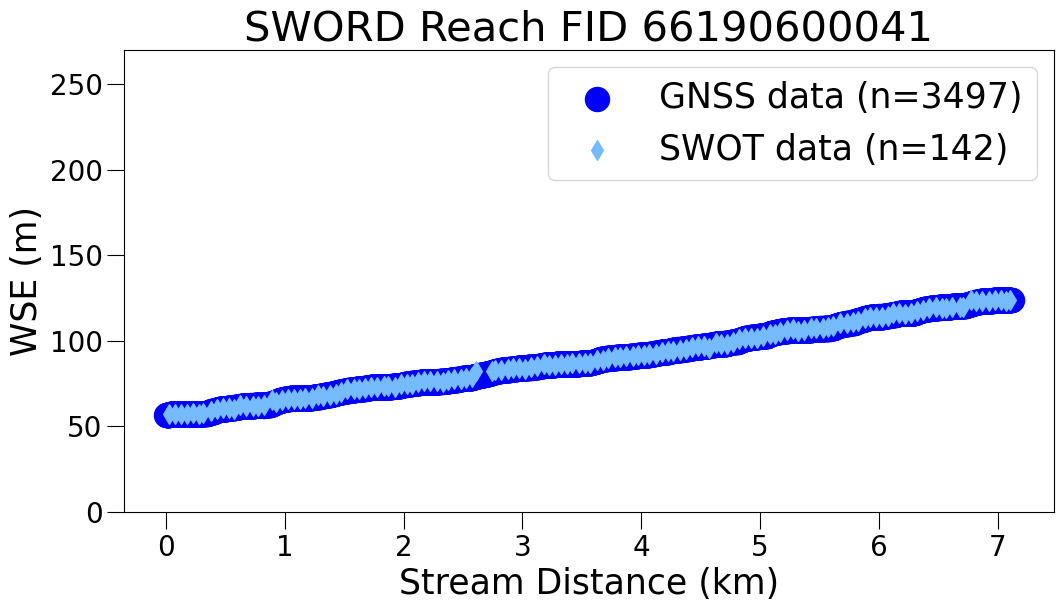

In [30]:
# Loop through each key in the dictionary
for key in keys_order[3:4]:
    df = dataframes_dict[key].iloc[::-1].copy()  # Reverse the order of the dataframe
    
    # Apply filter to keep points where classification is greater than 2
    df_filtered = apply_filter(df)
    
    # Create bins for every 5 meters in GNSS cumulative_distance
    bins_gnss = np.arange(0, df['cumulative_distance'].max() + 2, 2)
    bins_swot = np.arange(0, df_filtered['nearest_GNSS_dist'].max() + 50, 50)
    
    # Bin and average GNSS data
    df['binned_distance_GNSS'] = pd.cut(df['cumulative_distance'], bins=bins_gnss)
    df_binned_gnss = df.groupby('binned_distance_GNSS', observed=True).agg({'cumulative_distance': 'mean', 'Height(m)': 'mean'}).dropna()

    # Bin and average SWOT data
    df_filtered.loc[:, 'binned_distance_SWOT'] = pd.cut(df_filtered['nearest_GNSS_dist'], bins=bins_swot)
    df_binned_swot = df_filtered.groupby('binned_distance_SWOT', observed=True).agg({'nearest_GNSS_dist': 'mean', 'height': 'median'}).dropna()

    # Plotting
    plt.figure(figsize=(12, 6))
    
    non_na_gnss = len(df_binned_gnss)
    non_na_SWOT = len(df_binned_swot)

    # Scatter plot for binned GNSS data
    plt.scatter(df_binned_gnss['cumulative_distance'] / 1000, df_binned_gnss['Height(m)'], 
                label=f'GNSS data (n={non_na_gnss})', marker='o', s = 300, color=color_scheme[key])

    # Scatter plot for binned SWOT data
    plt.scatter(df_binned_swot['nearest_GNSS_dist'] / 1000, df_binned_swot['height'], 
                label=f'SWOT data (n={non_na_SWOT})', alpha=1, marker='d', s = 100, color=color_scheme_SWOT[key])

    # Adding titles and labels
    plt.title(f'SWORD Reach FID 66190600041', fontsize=30)
    plt.xlabel('Stream Distance (km)', fontsize=25)
    plt.ylabel('WSE (m)', fontsize=25)
    plt.legend(fontsize=25)
    plt.tick_params(axis='both', which='major', labelsize=20, size=12)
    plt.grid(False)
    plt.ylim(0, 270)

    # Save plot
    plt.savefig(f'publication_figs/{key}_SWOT_vs_GNSS_binned.png', dpi=300, bbox_inches='tight')

    # Show plot
    plt.show()


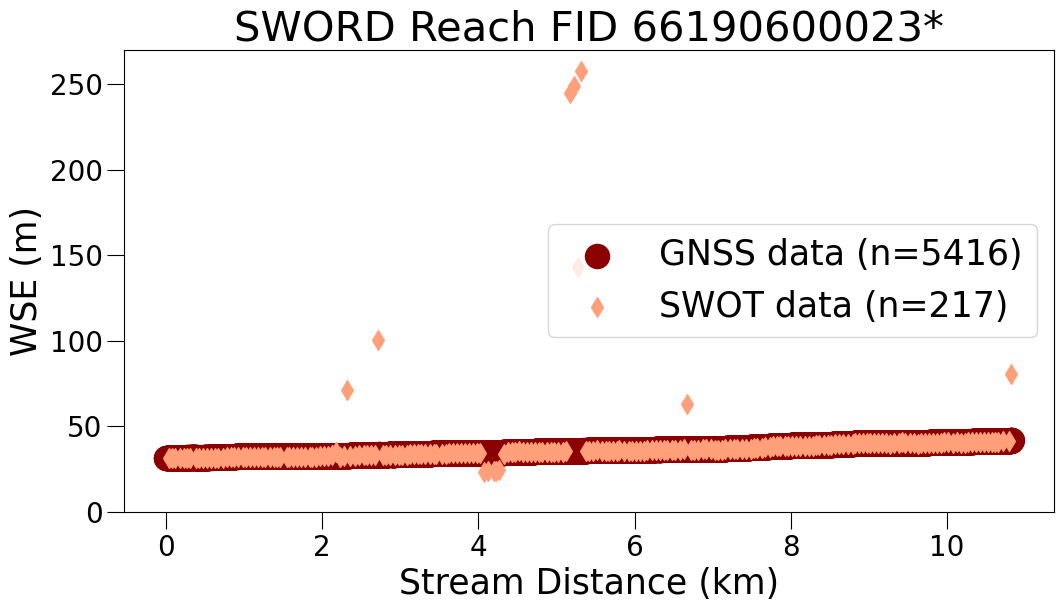

In [31]:
# Loop through each key in the dictionary
for key in keys_order[5:]:
    df = dataframes_dict[key].iloc[::-1].copy()  # Reverse the order of the dataframe
    
    # Apply filter to keep points where classification is greater than 2
    df_filtered = apply_filter(df)
    
    # Create bins for every 5 meters in GNSS cumulative_distance
    bins_gnss = np.arange(0, df['cumulative_distance'].max() + 2, 2)
    bins_swot = np.arange(0, df_filtered['nearest_GNSS_dist'].max() + 50, 50)
    
    # Bin and average GNSS data
    df['binned_distance_GNSS'] = pd.cut(df['cumulative_distance'], bins=bins_gnss)
    df_binned_gnss = df.groupby('binned_distance_GNSS', observed=True).agg({'cumulative_distance': 'mean', 'Height(m)': 'mean'}).dropna()

    # Bin and average SWOT data
    df_filtered.loc[:, 'binned_distance_SWOT'] = pd.cut(df_filtered['nearest_GNSS_dist'], bins=bins_swot)
    df_binned_swot = df_filtered.groupby('binned_distance_SWOT', observed=True).agg({'nearest_GNSS_dist': 'mean', 'height': 'median'}).dropna()

    # Plotting
    plt.figure(figsize=(12, 6))
    
    non_na_gnss = len(df_binned_gnss)
    non_na_SWOT = len(df_binned_swot)

    # Scatter plot for binned GNSS data
    plt.scatter(df_binned_gnss['cumulative_distance'] / 1000, df_binned_gnss['Height(m)'], 
                label=f'GNSS data (n={non_na_gnss})', marker='o', s=300, color=color_scheme[key])

    # Scatter plot for binned SWOT data
    plt.scatter(df_binned_swot['nearest_GNSS_dist'] / 1000, df_binned_swot['height'], 
                label=f'SWOT data (n={non_na_SWOT})', alpha=1, marker='d', s=100, color=color_scheme_SWOT[key])

    # Adding titles and labels
    plt.title(f'SWORD Reach FID 66190600023*', fontsize=30)
    plt.xlabel('Stream Distance (km)', fontsize=25)
    plt.ylabel('WSE (m)', fontsize=25)
    plt.legend(fontsize=25)
    plt.tick_params(axis='both', which='major', labelsize=20, size=12)
    plt.grid(False)
    plt.ylim(0, 270)
    # Save plot
    plt.savefig(f'publication_figs/{key}_SWOT_vs_GNSS_binned.png', dpi=300, bbox_inches='tight')

    # Show plot
    plt.show()


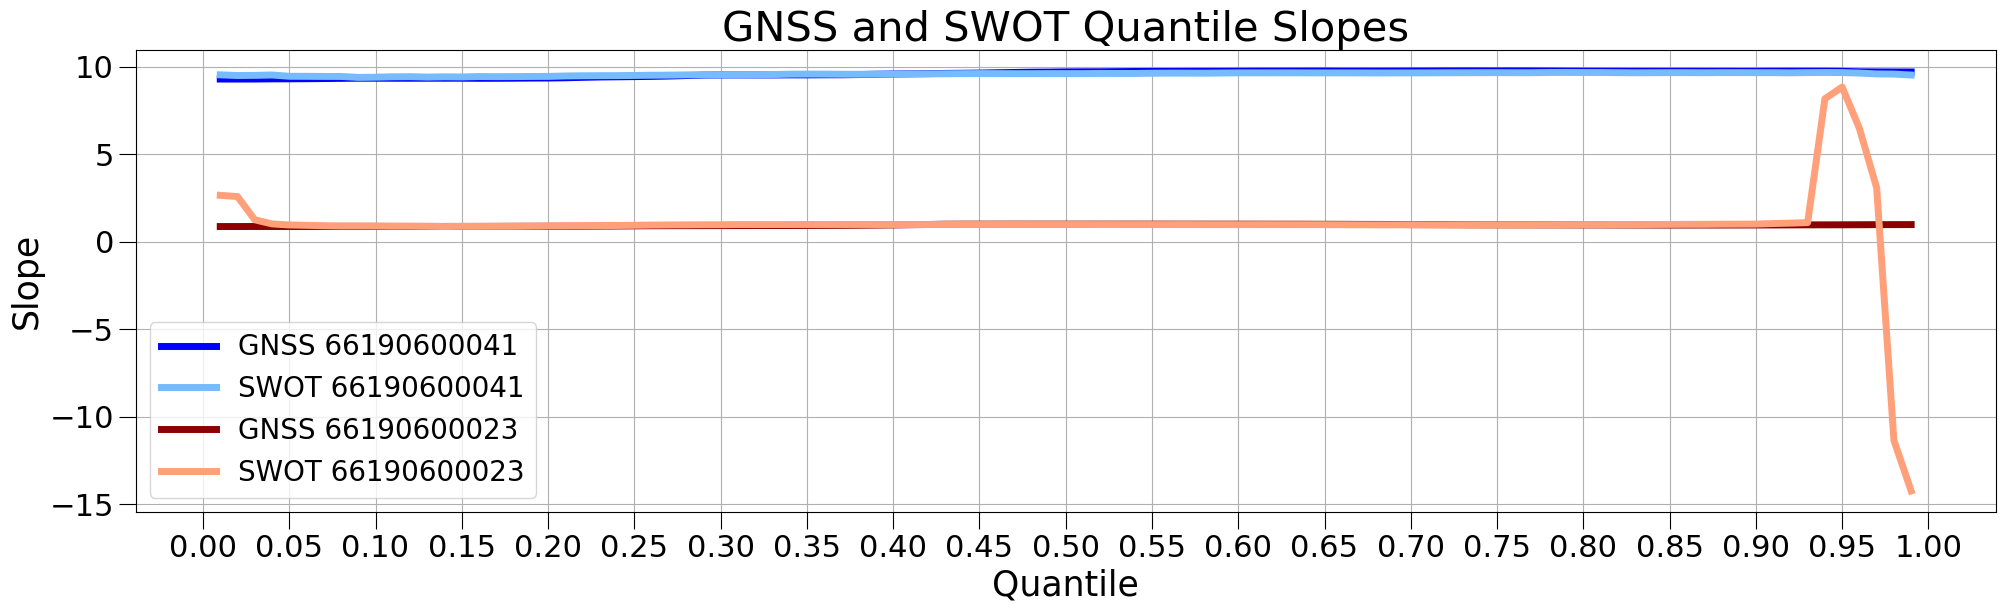

In [32]:
import matplotlib.ticker as ticker

plt.figure(figsize=(24, 6))  # Create a single figure

# Loop through selected keys
for key in keys_order[3:4] + keys_order[5:]:
    # Retrieve quantile regression results
    quantiles = quantile_regression_results[key]['quantiles']
    gnss_results = quantile_regression_results[key]['gnss_results']
    sword_results = quantile_regression_results[key]['sword_results']
    
    # Extract slopes for plotting
    gnss_slopes = [result[1] for result in gnss_results]
    sword_slopes = [result[1] for result in sword_results]

    # Extract numerical value from key between underscores
    key_numeric = re.search(r'_(\d+)_', str(key))
    key_label = key_numeric.group(1) if key_numeric else 'Unknown'

    # Plot GNSS and SWOT slopes on the same figure
    plt.plot(quantiles, gnss_slopes, linestyle='-', label=f'GNSS {key_label}', color=color_scheme[key], linewidth=5)
    plt.plot(quantiles, sword_slopes, linestyle='-', label=f'SWOT {key_label}', color=color_scheme_SWOT[key], linewidth=5)

# Set the major locator for the x and y axis to double the number of ticks
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=len(ax.get_xticks()) * 3))  # Double x-axis ticks
#ax.yaxis.set_major_locator(ticker.MaxNLocator(nbins=len(ax.get_yticks()) * 2))  # Double y-axis ticks


# Add legend, labels, and title
plt.xlabel('Quantile', fontsize=25)
plt.ylabel('Slope', fontsize=25)
plt.title('GNSS and SWOT Quantile Slopes', fontsize=30)
plt.legend(fontsize=20)
plt.grid(True)
plt.tick_params(axis='both', which='major', labelsize=22, size=12)
plt.savefig(f'publication_figs/Quantile_vs_slope.png', dpi=300, bbox_inches='tight')
plt.show()


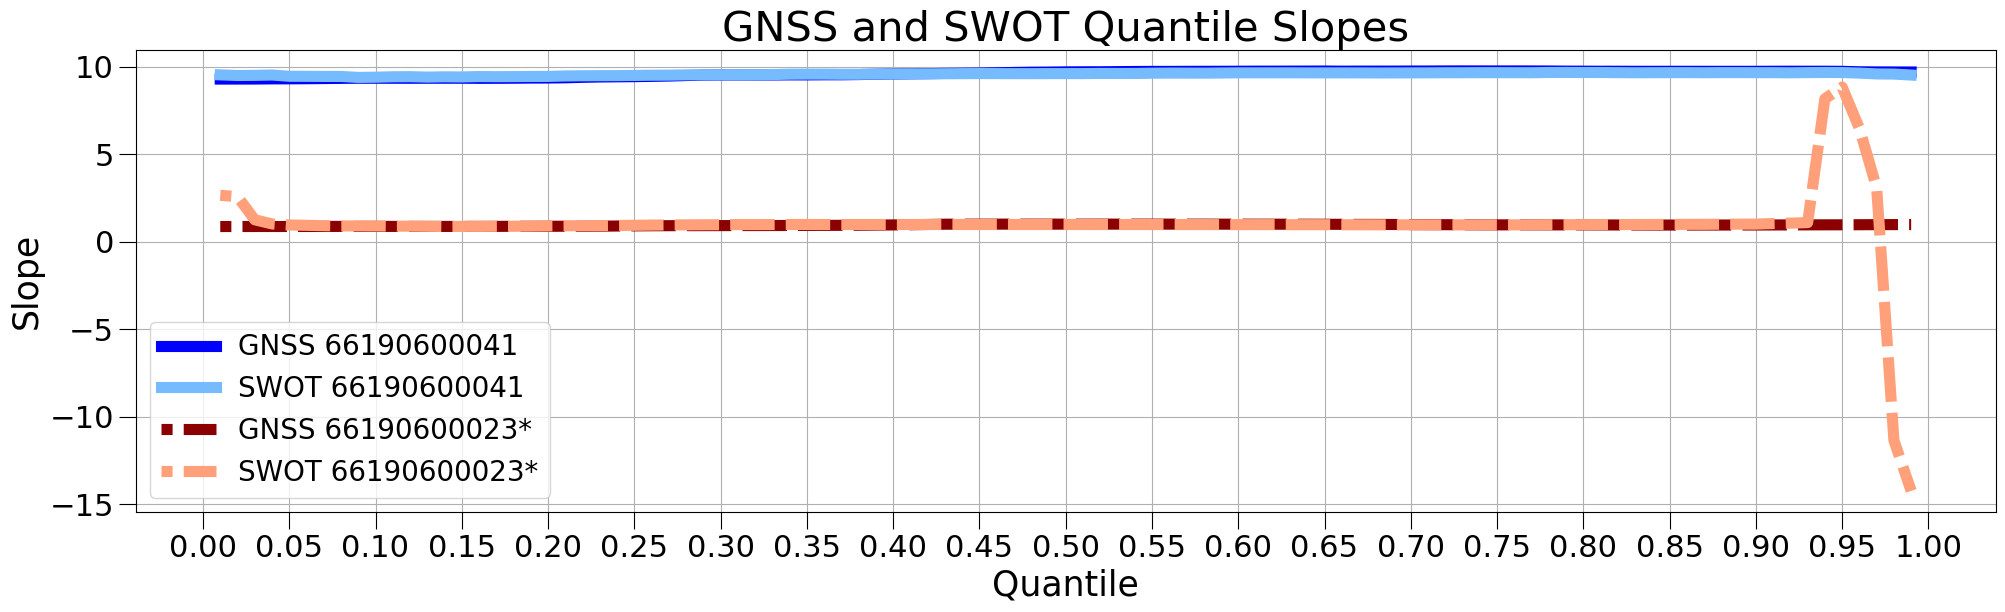

In [33]:
import matplotlib.ticker as ticker

plt.figure(figsize=(24, 6))  # Create a single figure

# Loop through selected keys
for idx, key in enumerate(keys_order[3:4] + keys_order[5:]):
    # Retrieve quantile regression results
    quantiles = quantile_regression_results[key]['quantiles']
    gnss_results = quantile_regression_results[key]['gnss_results']
    sword_results = quantile_regression_results[key]['sword_results']
    
    # Extract slopes for plotting
    gnss_slopes = [result[1] for result in gnss_results]
    sword_slopes = [result[1] for result in sword_results]

    # Extract numerical value from key between underscores
    key_numeric = re.search(r'_(\d+)_', str(key))
    key_label = key_numeric.group(1) if key_numeric else 'Unknown'

    # Add an asterisk to labels for the second key in the loop
    if idx == 1:  # The second iteration
        gnss_label = f'GNSS {key_label}*'
        sword_label = f'SWOT {key_label}*'
        lines = (3, (4, 1))
    else:
        gnss_label = f'GNSS {key_label}'
        sword_label = f'SWOT {key_label}'
        lines = '-'

    # Plot GNSS and SWOT slopes on the same figure
    plt.plot(quantiles, gnss_slopes, linestyle=lines, label=gnss_label, color=color_scheme[key], linewidth=8)
    plt.plot(quantiles, sword_slopes, linestyle=lines, label=sword_label, color=color_scheme_SWOT[key], linewidth=8)

# Set the major locator for the x and y axis to double the number of ticks
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=len(ax.get_xticks()) * 3))  # Double x-axis ticks

# Add legend, labels, and title
plt.xlabel('Quantile', fontsize=25)
plt.ylabel('Slope', fontsize=25)
plt.title('GNSS and SWOT Quantile Slopes', fontsize=30)
plt.legend(fontsize=20)
plt.grid(True)
plt.tick_params(axis='both', which='major', labelsize=22, size=12)
plt.savefig(f'publication_figs/Quantile_vs_slope.png', dpi=300, bbox_inches='tight')
plt.show()


/tmp/ipykernel_3573516/1681496953.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_within_bounds.loc[:, 'binned_distance_SWOT'] = pd.cut(df_within_bounds['nearest_GNSS_dist'], bins=bins_swot)
/tmp/ipykernel_3573516/1681496953.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_outside_bounds.loc[:, 'binned_distance_SWOT'] = pd.cut(df_outside_bounds['nearest_GNSS_dist'], bins=bins_swot)


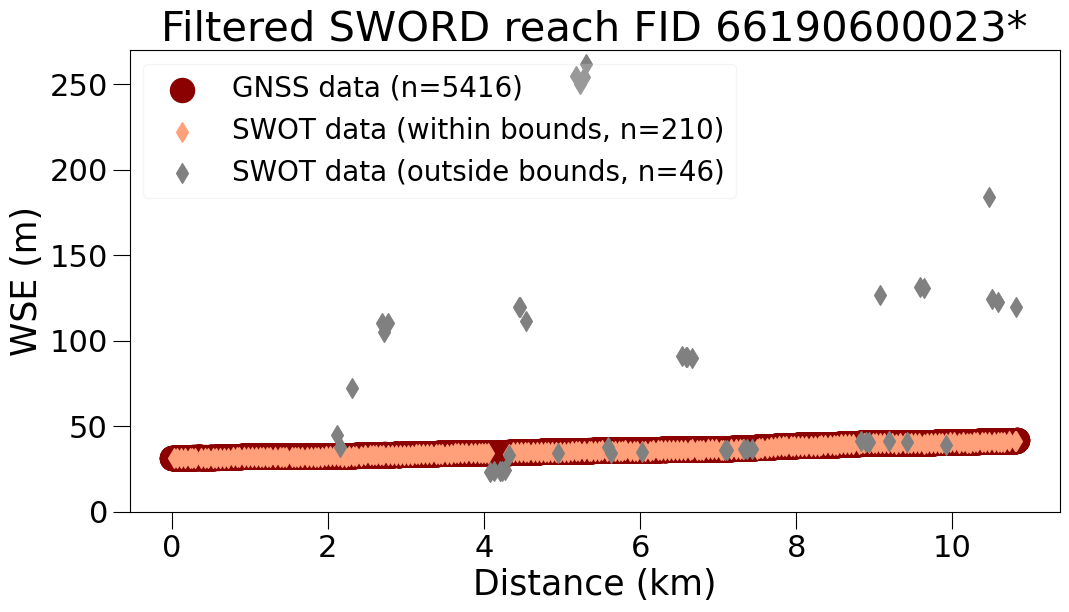

In [34]:
plt.figure(figsize=(12, 6))  # Adjust the figure size to accommodate all plots

# Loop through each key in the dictionary
for key in keys_order[5:]:
    # Load the saved CSV files
    df = pd.read_csv(f'{output_dir}/{key}_df.csv')
    df_filtered = pd.read_csv(f'{output_dir}/{key}_df_filtered.csv')

    # Calculate the 0.04 and 0.93 percentiles for 'height_detrended'
    lower_bound = df_filtered['height_detrended'].quantile(0.04)
    upper_bound = df_filtered['height_detrended'].quantile(0.93)

    # Create a mask for points within the bounds
    within_bounds_mask = (df_filtered['height_detrended'] >= lower_bound) & \
                         (df_filtered['height_detrended'] <= upper_bound)
    
    # Separate points within and outside the bounds
    df_within_bounds = df_filtered[within_bounds_mask]
    df_outside_bounds = df_filtered[~within_bounds_mask]
    
    # Create bins for every 1 meter in GNSS cumulative_distance
    bins_gnss = np.arange(0, df['cumulative_distance'].max() + 2, 2)
    bins_swot = np.arange(0, df_filtered['nearest_GNSS_dist'].max() + 50, 50)
    
    # Bin and average GNSS data
    df['binned_distance_GNSS'] = pd.cut(df['cumulative_distance'], bins=bins_gnss)
    df_binned_gnss = df.groupby('binned_distance_GNSS', observed=True).agg({'cumulative_distance': 'mean', 'Height(m)': 'mean'}).dropna()

    # Bin and average SWOT data within bounds
    df_within_bounds.loc[:, 'binned_distance_SWOT'] = pd.cut(df_within_bounds['nearest_GNSS_dist'], bins=bins_swot)
    df_binned_swot_within = df_within_bounds.groupby('binned_distance_SWOT', observed=True).agg({'nearest_GNSS_dist': 'mean', 'height': 'median'}).dropna()

    # Bin and average SWOT data outside bounds
    df_outside_bounds.loc[:, 'binned_distance_SWOT'] = pd.cut(df_outside_bounds['nearest_GNSS_dist'], bins=bins_swot)
    df_binned_swot_outside = df_outside_bounds.groupby('binned_distance_SWOT', observed=True).agg({'nearest_GNSS_dist': 'mean', 'height': 'median'}).dropna()

    # Plotting
    
    non_na_gnss = len(df_binned_gnss)
    non_na_SWOT_within = len(df_binned_swot_within)
    non_na_SWOT_outside = len(df_binned_swot_outside)

    # Scatter plot for binned GNSS data
    plt.scatter(df_binned_gnss['cumulative_distance'] / 1000, df_binned_gnss['Height(m)'], 
                label=f'GNSS data (n={non_na_gnss})', marker='o', s=300, color=color_scheme[key])

    # Scatter plot for binned SWOT data within bounds
    plt.scatter(df_binned_swot_within['nearest_GNSS_dist'] / 1000, df_binned_swot_within['height'], 
                label=f'SWOT data (within bounds, n={non_na_SWOT_within})', alpha=1, marker='d', s=100, color=color_scheme_SWOT[key])

    # Scatter plot for binned SWOT data outside bounds with 'x' marker
    plt.scatter(df_binned_swot_outside['nearest_GNSS_dist'] / 1000, df_binned_swot_outside['height'], 
                label=f'SWOT data (outside bounds, n={non_na_SWOT_outside})', alpha=1, marker='d', s=100, color='grey')

    # Adding titles and labels
    plt.title(f'Filtered SWORD reach FID 66190600023*', fontsize=30)
    plt.xlabel('Distance (km)', fontsize=25)
    plt.ylabel('WSE (m)', fontsize=25)
    plt.legend(fontsize=20, framealpha = 0.2)
    plt.tick_params(axis='both', which='major', labelsize=22, size=12)
    plt.grid(False)
    plt.ylim(0, 270)

    # Save plot
    plt.savefig(f'publication_figs/{key}_SWOT_vs_GNSS_filtered.png', dpi=300, bbox_inches='tight')

    # Show plot
    plt.show()


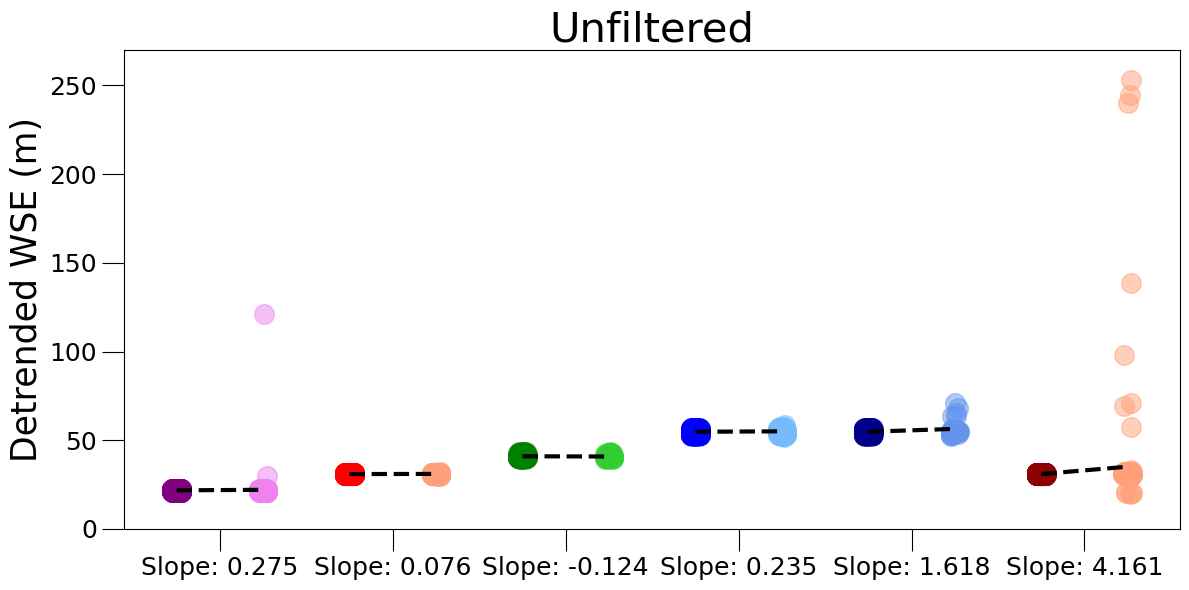

In [35]:
plt.figure(figsize=(12, 6))  # Adjust the figure size to accommodate all plots

# Lists to store the computed values for each dataset
gnss_ns = []
swot_ns = []
slopes = []

# Loop through each key in the dictionary
for key in keys_order:
    df = dataframes_dict[key].iloc[::-1].copy()  # Reverse the order and make a copy of the dataframe

    # Apply filter to keep points where classification is greater than 2
    df_filtered = apply_filter(df)

    # Create bins for every 5 meters in GNSS cumulative_distance
    bins_gnss = np.arange(0, df['cumulative_distance'].max() + 2, 2)
    bins_swot = np.arange(0, df_filtered['nearest_GNSS_dist'].max() + 50, 50)
    
    # Bin and average GNSS data
    df['binned_distance_GNSS'] = pd.cut(df['cumulative_distance'], bins=bins_gnss)
    df = df.groupby('binned_distance_GNSS', observed=True).agg({'cumulative_distance': 'mean', 'Height(m)': 'mean'}).dropna()

    # Bin and average SWOT data
    df_filtered.loc[:, 'binned_distance_SWOT'] = pd.cut(df_filtered['nearest_GNSS_dist'], bins=bins_swot)
    df_filtered = df_filtered.groupby('binned_distance_SWOT', observed=True).agg({'nearest_GNSS_dist': 'mean', 'height': 'median'}).dropna()


    # Perform linear regression for GNSS
    gnss_slope, gnss_intercept, _, _, _ = linregress(df['cumulative_distance'], df['Height(m)'])

    # Perform linear regression for SWOT
    swot_slope, swot_intercept, _, _, _ = linregress(df_filtered['nearest_GNSS_dist'], df_filtered['height'])

    # Detrend GNSS data
    df['Height_detrended'] = df['Height(m)'] - (gnss_slope * df['cumulative_distance'])

    # Detrend SWOT data
    df_filtered['height_detrended'] = df_filtered['height'] - (swot_slope * df_filtered['nearest_GNSS_dist'])

    # Combine the detrended datasets for OLS regression with dummy variables
    combined_df = pd.DataFrame({
        'Height_detrended': np.concatenate([df['Height_detrended'].values, df_filtered['height_detrended'].values]),
        'x': np.concatenate([np.zeros(len(df)), np.ones(len(df_filtered))])
    })

    # Store the calculated values
    gnss_ns.append(len(df['Height(m)']))
    swot_ns.append(len(df_filtered['height']))
    slope, intercept, _, _, _ = linregress(combined_df['x'], combined_df['Height_detrended'])
    slopes.append(slope)

    # Add jitter to x values for better visualization
    jitter_strength = 0.05
    combined_df['x_jittered'] = combined_df['x'] + np.random.uniform(-jitter_strength, jitter_strength, size=combined_df.shape[0])
    
    # Extract numerical value from key between underscores
    key_numeric = re.search(r'_(\d+)_', str(key))
    key_label = key_numeric.group(1) if key_numeric else 'Unknown'
    
    # Create scatter plot with jitter and transparency for each dataset
    plt.scatter(combined_df['x_jittered'][combined_df['x'] == 0] + keys_order.index(key) * 2, 
                combined_df['Height_detrended'][combined_df['x'] == 0], 
                label=f'', color=color_scheme[key], s=200, alpha=0.08)
    plt.scatter(combined_df['x_jittered'][combined_df['x'] == 1] + keys_order.index(key) * 2, 
                combined_df['Height_detrended'][combined_df['x'] == 1], 
                label=f'{key_label}', color=color_scheme_SWOT[key], s=200, alpha=0.5)

    # Plot the OLS line for each dataset, adjusting the x positions
    x_vals = np.array([0, 1]) + keys_order.index(key) * 2
    y_vals = intercept + slope * np.array([0, 1])
    plt.plot(x_vals, y_vals, color='black', linestyle='--', linewidth=3)

# Set x-axis ticks with slope and dataset size information
plt.xticks([i * 2 + 0.5 for i in range(len(keys_order))], 
           [f'Slope: {slopes[i]:.3f}' 
            for i in range(len(keys_order))])

# Add titles and labels
plt.title('Unfiltered', fontsize=30)
plt.xlabel('', fontsize=25)
plt.ylabel('Detrended WSE (m)', fontsize=25)
plt.ylim(0, 270)
#plt.legend(title = 'SWORD Reach:', fontsize=20, title_fontsize=22)


# Display and save the plot
plt.tick_params(axis='both', which='major', labelsize=18, size=16)
plt.grid(False)
plt.tight_layout()
plt.savefig(f'publication_figs/SWOT_vs_GNSS_DUMMY_unfiltered.png', dpi=300, bbox_inches='tight')
plt.show()

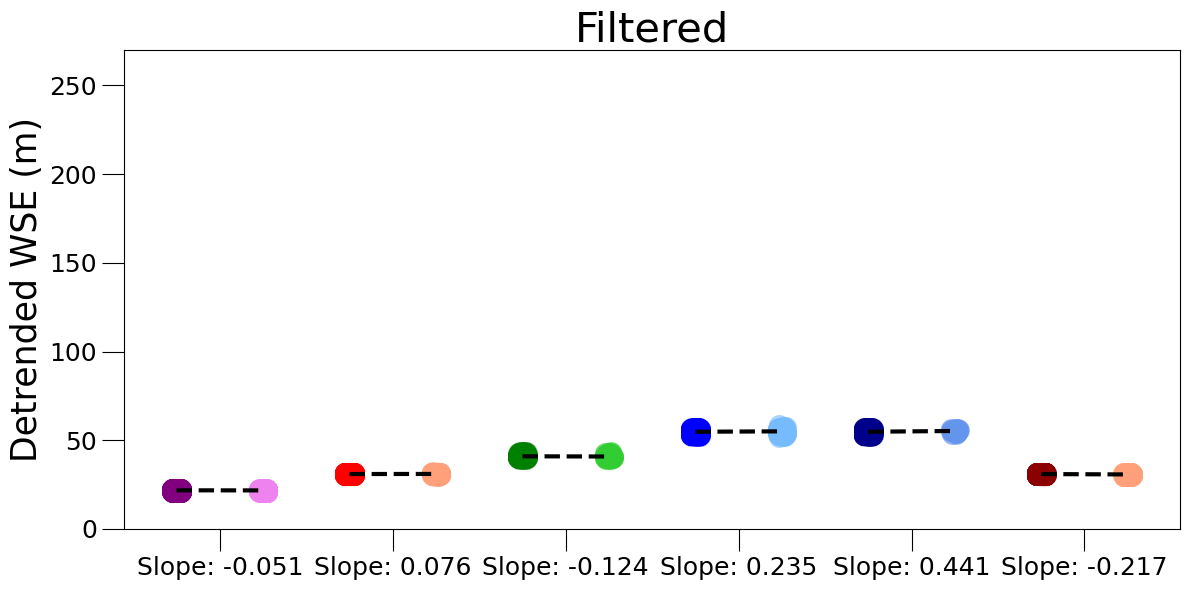

In [36]:
plt.figure(figsize=(12, 6))  # Create a single figure for all plots

# Lists to store the computed values for each dataset
gnss_ns = []
swot_ns = []
slopes = []

# Process the last two keys with different quantile ranges
for i, key in enumerate(keys_order[0:1]):
    df = pd.read_csv(f'{output_dir}/{key}_df.csv')
    df_filtered = pd.read_csv(f'{output_dir}/{key}_df_filtered.csv') 

    # Set different quantile ranges for each dataset
    if key == 'buffered_66190600041_20240131_GNSS_SWOT_cumulative_dist_height':
        lower_bound = df_filtered['height_detrended'].quantile(0.00)
        upper_bound = df_filtered['height_detrended'].quantile(0.83)
    elif key == 'buffered_66190600023_20240131_GNSS_SWOT_cumulative_dist_height':
        lower_bound = df_filtered['height_detrended'].quantile(0.04)
        upper_bound = df_filtered['height_detrended'].quantile(0.93)
    elif key == 'buffered_66190600011_GNSS_SWOT_cumulative_dist_height':
        lower_bound = df_filtered['height_detrended'].quantile(0.00)
        upper_bound = df_filtered['height_detrended'].quantile(0.99)

    # Filter the DataFrame to keep only the rows within the specified quantile range
    df_filtered = df_filtered[(df_filtered['height_detrended'] >= lower_bound) & 
                                       (df_filtered['height_detrended'] <= upper_bound)]

    
    # Create bins for every 5 meters in GNSS cumulative_distance
    bins_gnss = np.arange(0, df['cumulative_distance'].max() + 2, 2)
    bins_swot = np.arange(0, df_filtered['nearest_GNSS_dist'].max() + 50, 50)
    
    # Bin and average GNSS data
    df['binned_distance_GNSS'] = pd.cut(df['cumulative_distance'], bins=bins_gnss)
    df = df.groupby('binned_distance_GNSS', observed=True).agg({'cumulative_distance': 'mean', 'Height(m)': 'mean'}).dropna()

    # Bin and average SWOT data
    df_filtered.loc[:, 'binned_distance_SWOT'] = pd.cut(df_filtered['nearest_GNSS_dist'], bins=bins_swot)
    df_filtered = df_filtered.groupby('binned_distance_SWOT', observed=True).agg({'nearest_GNSS_dist': 'mean', 'height': 'median'}).dropna()


    # Perform linear regression for GNSS
    gnss_slope, gnss_intercept, _, _, _ = linregress(df['cumulative_distance'], df['Height(m)'])

    # Perform linear regression for SWOT
    swot_slope, swot_intercept, _, _, _ = linregress(df_filtered['nearest_GNSS_dist'], df_filtered['height'])

    # Detrend GNSS data
    df['Height_detrended'] = df['Height(m)'] - (gnss_slope * df['cumulative_distance'])

    # Detrend SWOT data
    df_filtered['height_detrended'] = df_filtered['height'] - (swot_slope * df_filtered['nearest_GNSS_dist'])

    # Combine the detrended datasets for OLS regression with dummy variables
    combined_df = pd.DataFrame({
        'Height_detrended': np.concatenate([df['Height_detrended'].values, df_filtered['height_detrended'].values]),
        'x': np.concatenate([np.zeros(len(df)), np.ones(len(df_filtered))])
    })

    # Store the calculated values
    gnss_ns.append(len(df['Height(m)']))
    swot_ns.append(len(df_filtered['height']))
    slope, intercept, _, _, _ = linregress(combined_df['x'], combined_df['Height_detrended'])
    slopes.append(slope)

    # Add jitter to x values for better visualization
    jitter_strength = 0.05
    combined_df['x_jittered'] = combined_df['x'] + np.random.uniform(-jitter_strength, jitter_strength, size=combined_df.shape[0])

    # Extract numerical value from key between underscores
    key_numeric = re.search(r'_(\d+)_', str(key))
    key_label = key_numeric.group(1) if key_numeric else 'Unknown'
    
    # Create scatter plot with jitter and transparency for each dataset
    plt.scatter(combined_df['x_jittered'][combined_df['x'] == 0] + keys_order.index(key) * 2, 
                combined_df['Height_detrended'][combined_df['x'] == 0], 
                label=f'', color=color_scheme[key], s=200, alpha=0.08)
    plt.scatter(combined_df['x_jittered'][combined_df['x'] == 1] + keys_order.index(key) * 2, 
                combined_df['Height_detrended'][combined_df['x'] == 1], 
                label=f'{key_label}*', color=color_scheme_SWOT[key], s=200, alpha=0.5)

    # Plot the OLS line for each dataset, adjusting the x positions
    x_vals = np.array([0, 1]) + keys_order.index(key) * 2
    y_vals = intercept + slope * np.array([0, 1])
    plt.plot(x_vals, y_vals, color='black', linestyle='--', linewidth=3)



# Process the first keys using the original method
for key in keys_order[1:4]:
    df = dataframes_dict[key].iloc[::-1].copy()  # Reverse the order and make a copy of the dataframe

    # Apply filter to keep points where classification is greater than 2
    df_filtered = apply_filter(df)

    # Create bins for every 5 meters in GNSS cumulative_distance
    bins_gnss = np.arange(0, df['cumulative_distance'].max() + 2, 2)
    bins_swot = np.arange(0, df_filtered['nearest_GNSS_dist'].max() + 50, 50)
    
    # Bin and average GNSS data
    df['binned_distance_GNSS'] = pd.cut(df['cumulative_distance'], bins=bins_gnss)
    df = df.groupby('binned_distance_GNSS', observed=True).agg({'cumulative_distance': 'mean', 'Height(m)': 'mean'}).dropna()

    # Bin and average SWOT data
    df_filtered.loc[:, 'binned_distance_SWOT'] = pd.cut(df_filtered['nearest_GNSS_dist'], bins=bins_swot)
    df_filtered = df_filtered.groupby('binned_distance_SWOT', observed=True).agg({'nearest_GNSS_dist': 'mean', 'height': 'median'}).dropna()


    # Perform linear regression for GNSS
    gnss_slope, gnss_intercept, _, _, _ = linregress(df['cumulative_distance'], df['Height(m)'])

    # Perform linear regression for SWOT
    swot_slope, swot_intercept, _, _, _ = linregress(df_filtered['nearest_GNSS_dist'], df_filtered['height'])

    # Detrend GNSS data
    df['Height_detrended'] = df['Height(m)'] - (gnss_slope * df['cumulative_distance'])

    # Detrend SWOT data
    df_filtered['height_detrended'] = df_filtered['height'] - (swot_slope * df_filtered['nearest_GNSS_dist'])

    # Combine the detrended datasets for OLS regression with dummy variables
    combined_df = pd.DataFrame({
        'Height_detrended': np.concatenate([df['Height_detrended'].values, df_filtered['height_detrended'].values]),
        'x': np.concatenate([np.zeros(len(df)), np.ones(len(df_filtered))])
    })

    # Store the calculated values
    gnss_ns.append(len(df['Height(m)']))
    swot_ns.append(len(df_filtered['height']))
    slope, intercept, _, _, _ = linregress(combined_df['x'], combined_df['Height_detrended'])
    slopes.append(slope)

    # Add jitter to x values for better visualization
    jitter_strength = 0.05
    combined_df['x_jittered'] = combined_df['x'] + np.random.uniform(-jitter_strength, jitter_strength, size=combined_df.shape[0])

    # Extract numerical value from key between underscores
    key_numeric = re.search(r'_(\d+)_', str(key))
    key_label = key_numeric.group(1) if key_numeric else 'Unknown'
    
    # Create scatter plot with jitter and transparency for each dataset
    plt.scatter(combined_df['x_jittered'][combined_df['x'] == 0] + keys_order.index(key) * 2, 
                combined_df['Height_detrended'][combined_df['x'] == 0], 
                label=f'', color=color_scheme[key], s=200, alpha=0.08)
    plt.scatter(combined_df['x_jittered'][combined_df['x'] == 1] + keys_order.index(key) * 2, 
                combined_df['Height_detrended'][combined_df['x'] == 1], 
                label=f'{key_label}', color=color_scheme_SWOT[key], s=200, alpha=0.5)

    # Plot the OLS line for each dataset, adjusting the x positions
    x_vals = np.array([0, 1]) + keys_order.index(key) * 2
    y_vals = intercept + slope * np.array([0, 1])
    plt.plot(x_vals, y_vals, color='black', linestyle='--', linewidth=3)

# Process the last two keys with different quantile ranges
for i, key in enumerate(keys_order[4:]):
    df = pd.read_csv(f'{output_dir}/{key}_df.csv')
    df_filtered = pd.read_csv(f'{output_dir}/{key}_df_filtered.csv') 

    # Set different quantile ranges for each dataset
    if key == 'buffered_66190600041_20240131_GNSS_SWOT_cumulative_dist_height':
        lower_bound = df_filtered['height_detrended'].quantile(0.00)
        upper_bound = df_filtered['height_detrended'].quantile(0.83)
    elif key == 'buffered_66190600023_20240131_GNSS_SWOT_cumulative_dist_height':
        lower_bound = df_filtered['height_detrended'].quantile(0.04)
        upper_bound = df_filtered['height_detrended'].quantile(0.93)
    elif key == 'buffered_66190600011_GNSS_SWOT_cumulative_dist_height':
        lower_bound = df_filtered['height_detrended'].quantile(0.00)
        upper_bound = df_filtered['height_detrended'].quantile(0.99)

    # Filter the DataFrame to keep only the rows within the specified quantile range
    df_filtered = df_filtered[(df_filtered['height_detrended'] >= lower_bound) & 
                                       (df_filtered['height_detrended'] <= upper_bound)]

    
    # Create bins for every 5 meters in GNSS cumulative_distance
    bins_gnss = np.arange(0, df['cumulative_distance'].max() + 2, 2)
    bins_swot = np.arange(0, df_filtered['nearest_GNSS_dist'].max() + 50, 50)
    
    # Bin and average GNSS data
    df['binned_distance_GNSS'] = pd.cut(df['cumulative_distance'], bins=bins_gnss)
    df = df.groupby('binned_distance_GNSS', observed=True).agg({'cumulative_distance': 'mean', 'Height(m)': 'mean'}).dropna()

    # Bin and average SWOT data
    df_filtered.loc[:, 'binned_distance_SWOT'] = pd.cut(df_filtered['nearest_GNSS_dist'], bins=bins_swot)
    df_filtered = df_filtered.groupby('binned_distance_SWOT', observed=True).agg({'nearest_GNSS_dist': 'mean', 'height': 'median'}).dropna()


    # Perform linear regression for GNSS
    gnss_slope, gnss_intercept, _, _, _ = linregress(df['cumulative_distance'], df['Height(m)'])

    # Perform linear regression for SWOT
    swot_slope, swot_intercept, _, _, _ = linregress(df_filtered['nearest_GNSS_dist'], df_filtered['height'])

    # Detrend GNSS data
    df['Height_detrended'] = df['Height(m)'] - (gnss_slope * df['cumulative_distance'])

    # Detrend SWOT data
    df_filtered['height_detrended'] = df_filtered['height'] - (swot_slope * df_filtered['nearest_GNSS_dist'])

    # Combine the detrended datasets for OLS regression with dummy variables
    combined_df = pd.DataFrame({
        'Height_detrended': np.concatenate([df['Height_detrended'].values, df_filtered['height_detrended'].values]),
        'x': np.concatenate([np.zeros(len(df)), np.ones(len(df_filtered))])
    })

    # Store the calculated values
    gnss_ns.append(len(df['Height(m)']))
    swot_ns.append(len(df_filtered['height']))
    slope, intercept, _, _, _ = linregress(combined_df['x'], combined_df['Height_detrended'])
    slopes.append(slope)

    # Add jitter to x values for better visualization
    jitter_strength = 0.05
    combined_df['x_jittered'] = combined_df['x'] + np.random.uniform(-jitter_strength, jitter_strength, size=combined_df.shape[0])

    # Extract numerical value from key between underscores
    key_numeric = re.search(r'_(\d+)_', str(key))
    key_label = key_numeric.group(1) if key_numeric else 'Unknown'
    
    # Create scatter plot with jitter and transparency for each dataset
    plt.scatter(combined_df['x_jittered'][combined_df['x'] == 0] + keys_order.index(key) * 2, 
                combined_df['Height_detrended'][combined_df['x'] == 0], 
                label=f'', color=color_scheme[key], s=200, alpha=0.08)
    plt.scatter(combined_df['x_jittered'][combined_df['x'] == 1] + keys_order.index(key) * 2, 
                combined_df['Height_detrended'][combined_df['x'] == 1], 
                label=f'{key_label}*', color=color_scheme_SWOT[key], s=200, alpha=0.5)

    # Plot the OLS line for each dataset, adjusting the x positions
    x_vals = np.array([0, 1]) + keys_order.index(key) * 2
    y_vals = intercept + slope * np.array([0, 1])
    plt.plot(x_vals, y_vals, color='black', linestyle='--', linewidth=3)

# Set x-axis ticks with slope and dataset size information
plt.xticks([i * 2 + 0.5 for i in range(len(keys_order))], 
           [f'Slope: {slopes[i]:.3f}' 
            for i in range(len(keys_order))])

# Add titles and labels
plt.title('Filtered', fontsize=30)
plt.xlabel('', fontsize=25)
plt.ylabel('Detrended WSE (m)', fontsize=25)
plt.ylim(0, 270)
#plt.legend(title = 'SWORD Reach:', fontsize=20, title_fontsize=22, loc='upper left')


# Display and save the plot
plt.tick_params(axis='both', which='major', labelsize=18, size=16)
plt.grid(False)
plt.tight_layout()
plt.savefig(f'publication_figs/SWOT_vs_GNSS_DUMMY_filtered.png', dpi=300, bbox_inches='tight')
plt.show()


<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


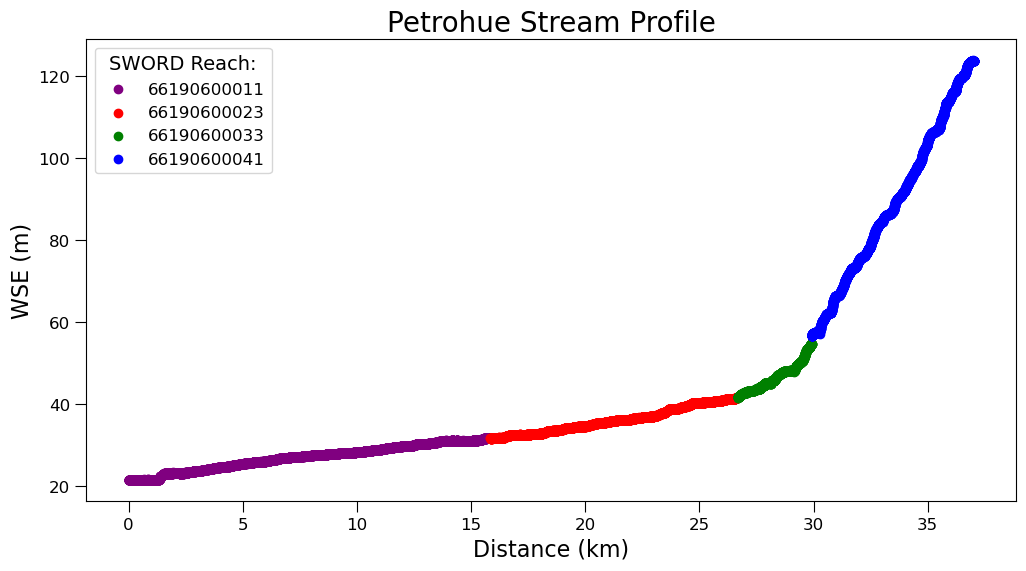

In [37]:
# Plotting
plt.figure(figsize=(12, 6))

# Initialize the cumulative offset
cumulative_offset = 0

for key in keys_order[0:4]:
    df = dataframes_dict[key]
    print(type(df['geometry'][0]))
    
    # Handle NaNs by dropping them
    df = df.dropna(subset=['cumulative_distance', 'Height(m)'])
    
    # Adjust the cumulative distance for the current section
    cumulative_distance_gnss = (df['cumulative_distance']/1000) + cumulative_offset

    cumulative_distance_swot = (df['cumulative_distance']/1000) + cumulative_offset

    # Extract numerical value from key between underscores
    key_numeric = re.search(r'_(\d+)_', str(key))
    key_label = key_numeric.group(1) if key_numeric else 'Unknown'
    
    # Scatter plot for cumulative_distance_GNSS vs GNSS_height
    plt.scatter(cumulative_distance_gnss, df['Height(m)'], label=f'{key_label}', marker='o', color=color_scheme[key])

    # Scatter plot for cumulative_distance_SWORD vs nearest_height_SWORD
    #plt.scatter(cumulative_distance_swot, df['nearest_height_SWORD'], label=f'SWOT', alpha = .2, marker='x', color = color_scheme_SWOT[key])
    
    
    # Update the cumulative offset for the next section
    cumulative_offset = (df['cumulative_distance']/1000 + cumulative_offset).max()

# Adding titles and labels
plt.title('Petrohue Stream Profile', fontsize = 20)
plt.xlabel('Distance (km)', fontsize=16)
plt.ylabel('WSE (m)', fontsize=16)
plt.legend(title = 'SWORD Reach:', fontsize=12, title_fontsize=14)
plt.grid(False)
plt.tick_params(axis='both', which='major', labelsize=12, size=8)

plt.savefig(f'publication_figs/GNSS_data_all_reaches.png', dpi=300, bbox_inches='tight')

# Show plot
plt.show()

NameError: name 'wkt' is not defined

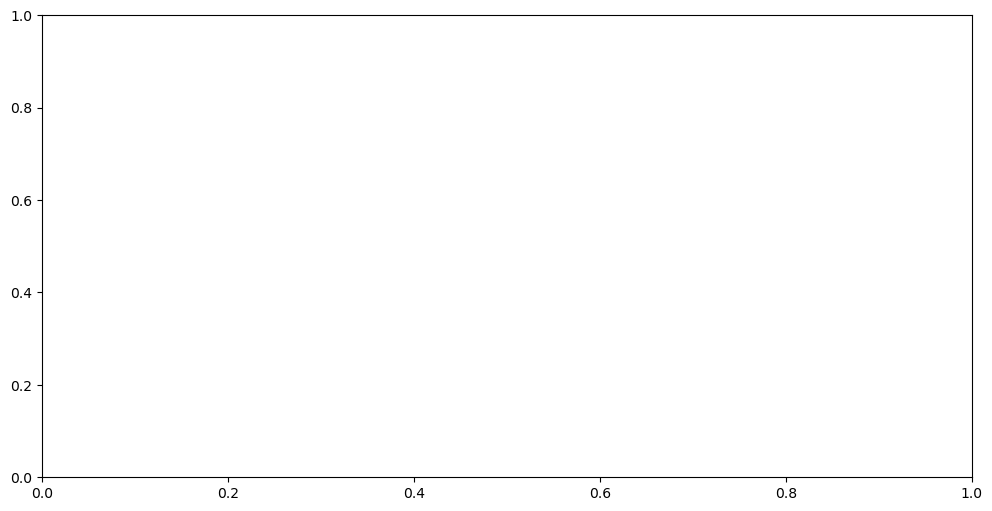

In [38]:
# Step 1: Set up the figure and main axis
fig, ax = plt.subplots(figsize=(12, 6))

# Step 2: Loop through each key and process the data
for key in keys_order[0:4]:
    if isinstance(dataframes_dict[key]['geometry'].iloc[0], str):
        dataframes_dict[key]['geometry'] = dataframes_dict[key]['geometry'].apply(wkt.loads)
    elif not isinstance(dataframes_dict[key]['geometry'].iloc[0], Point):
        raise ValueError("The geometry column must contain either WKT strings or Shapely Point objects.")

    gdf = gpd.GeoDataFrame(dataframes_dict[key], geometry='geometry', crs='EPSG:32718')
    gdf = gdf.to_crs(epsg=3857)

    key_numeric = re.search(r'_(\d+)_', str(key))
    key_label = key_numeric.group(1) if key_numeric else 'Unknown'
    gdf.plot(ax=ax, marker='o', color=color_scheme[key], label=f'{key_label}', alpha=0.5)

plt.title('Petrohue', fontsize=20)

# Step 3: Create an inset axis for the context map
ax_inset = inset_axes(ax, width=3.5, height=2.5, loc='upper left', borderpad=2)

# Plot the inset map (for example, using a GeoDataFrame representing the broader region)
gdf.plot(ax=ax_inset, marker='o', color='orange', alpha=0.3)

# Set larger extent (zoom out) for the inset axis
inset_x_min, inset_x_max = ax_inset.get_xlim()
inset_y_min, inset_y_max = ax_inset.get_ylim()

# Increase the extents by a zoom-out factor
zoom_out_factor_inset = 500  # Adjust to control how much to zoom out
ax_inset.set_xlim(inset_x_min - (inset_x_max - inset_x_min) * (zoom_out_factor_inset - 1), 
                  inset_x_max + (inset_x_max - inset_x_min) * (zoom_out_factor_inset - 1))
ax_inset.set_ylim(inset_y_min - (inset_y_max - inset_y_min) * (zoom_out_factor_inset - 1), 
                  inset_y_max + (inset_y_max - inset_y_min) * (zoom_out_factor_inset - 1))

# Add basemap to the inset axis with a lower zoom level for a broader view
ctx.add_basemap(ax_inset, source=ctx.providers.CartoDB.Positron, zoom=3)

# Customize inset axis (remove ticks and labels for a cleaner look)
ax_inset.set_xticks([])
ax_inset.set_yticks([])
ax_inset.spines['top'].set_linewidth(1.5)
ax_inset.spines['right'].set_linewidth(1.5)
ax_inset.spines['bottom'].set_linewidth(1.5)
ax_inset.spines['left'].set_linewidth(1.5)

# Step 4: Set the main plot limits and add the main basemap
ax.set_xlim(-8070527.4364273315 - x_buffer1, -8048498.229363165 + x_buffer2)
ax.set_ylim(-5069867.6220279345 - bottom_buffer, -5037850.1772457 + top_buffer)
ax.axis('off')  # Remove the axis for a cleaner map
ctx.add_basemap(ax, source=ctx.providers.Esri.WorldStreetMap, zoom=13)


#ax.legend(title='SWORD Reach:', fontsize=10, title_fontsize=12, loc='center left', bbox_to_anchor=(0.42, 0.4))

# Step 5: Save and show the final figure
plt.savefig(f'publication_figs/GNSS_data_all_reaches_map_with_inset.png', dpi=300, bbox_inches='tight')
plt.show()
